**CONSIGNA**
1. Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


En el siguiente fragmeto se cargan las imagenes de Will (original y a comparar)

In [39]:
import os
filenames = os.listdir("img")
filenames.sort()
print(filenames)

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


In [40]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    suma = 0

    for x in range(largo):
        for y in range(ancho):
            if cuadrada:
                suma += int(imagen[x][y]) * int(imagen[x][y])
            else:
                suma += int(imagen[x][y])

    return float(suma)/(largo*ancho)

In [41]:
def desvio(imagen, media_imagen):
    """
    desvio = sqrt(<x2> - <x>2)
    """
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    return desvio

In [42]:
def correlacion_cruzada(imagen_a,imagen_b):
    if(len(imagen_a)!= len(imagen_b) or len(imagen_a[0]) != len(imagen_b[0])):
        return

    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])

    return  float(suma_ambos)/(largo*ancho)

In [43]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

In [44]:
import os
import imageio

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

In [45]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1


Procesado imagen 1 ...
Procesado imagen 2 ...
Procesado imagen 3 ...
Procesado imagen 4 ...
Procesado imagen 5 ...


In [46]:
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0])

Imagen 1
Imagen 2
Imagen 3
Imagen 5
Imagen 4


Populating the interactive namespace from numpy and matplotlib


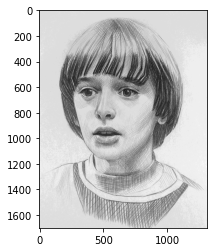

In [47]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(will_original,cmap='gray',vmin=0,vmax=255)
plt.show()

2- Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

In [48]:
def distribucion_intensidad(imagen):
    #posible mejora, en ves de usar un arreglo usar otra estructura
    #como un mapa o algo asi porque hay muchos valores de intesidad 
    #que no se usan
    dist = {} #esto nose si se hace asi -> joya
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=(float)(dist[key]/(largo*ancho))
    return dist


distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad(will_fotos_busqueda[0])
distribucion_policia = distribucion_intensidad(will_policia)

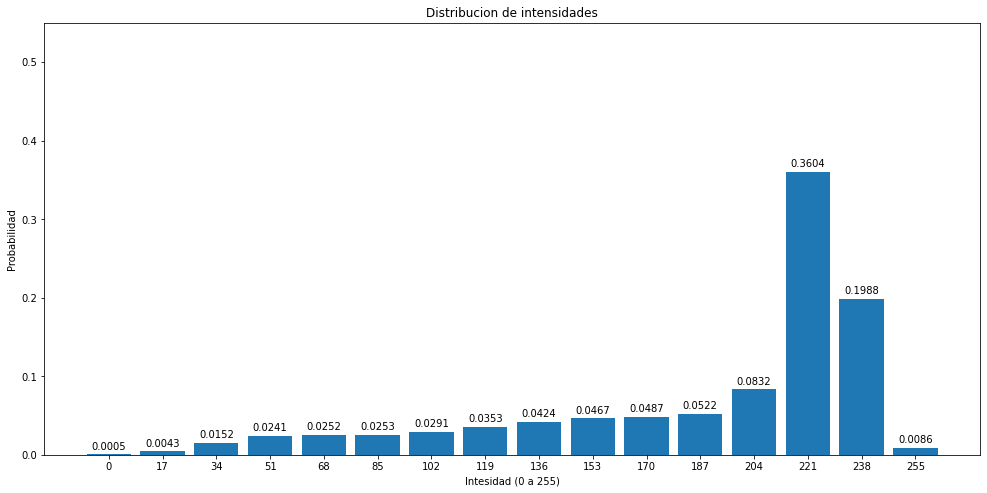

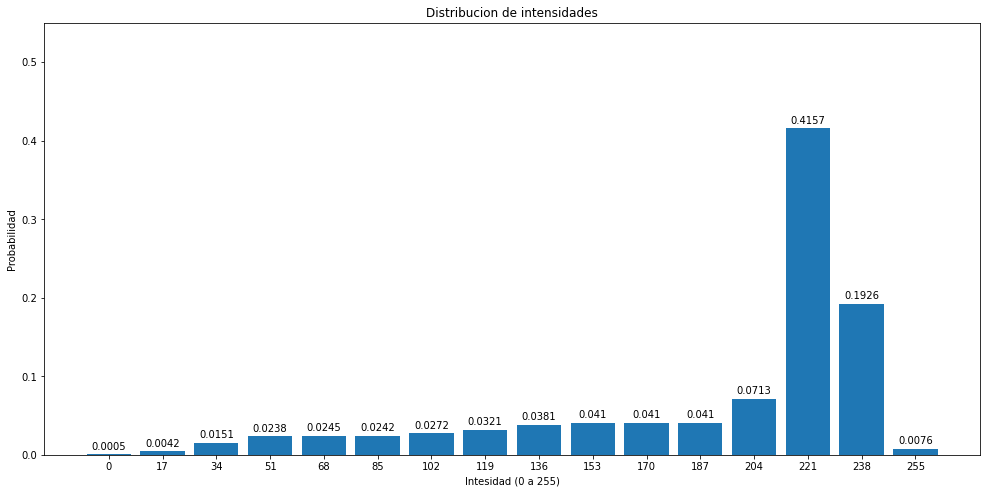

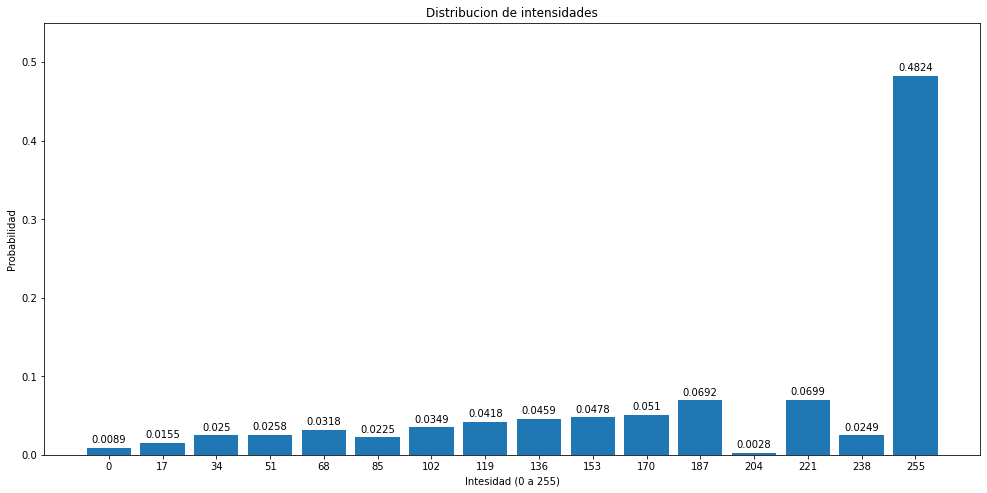

In [49]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,6)

# Funcion para poner el label arriba de cada barrita
def autolabel(rects,ejes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round((float)(rect.get_height()),4)
        ejes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)

# funcion para generar histograma a partir de una distribucion
def generar_histograma(distribucion):
    valores = list(distribucion.values())
    intensidades = list(distribucion.keys())

    # configuracion del plotting
    figura = plt.figure()
    ejes = figura.add_axes([0,0,1,1])
    histograma = ejes.bar(intensidades,valores,width=14)
    plt.xticks(intensidades,intensidades)

    # titulos y labels
    ejes.set_title('Distribucion de intensidades')
    ejes.set_xlabel('Intesidad (0 a 255)')
    ejes.set_ylabel('Probabilidad')
    
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas
    plt.autoscale(False)

    # generar autolabels
    autolabel(histograma,ejes)

    # Mostrar el grafico
    plt.show()

generar_histograma(distribucion_original)
generar_histograma(distribucion_parecida)
generar_histograma(distribucion_policia)


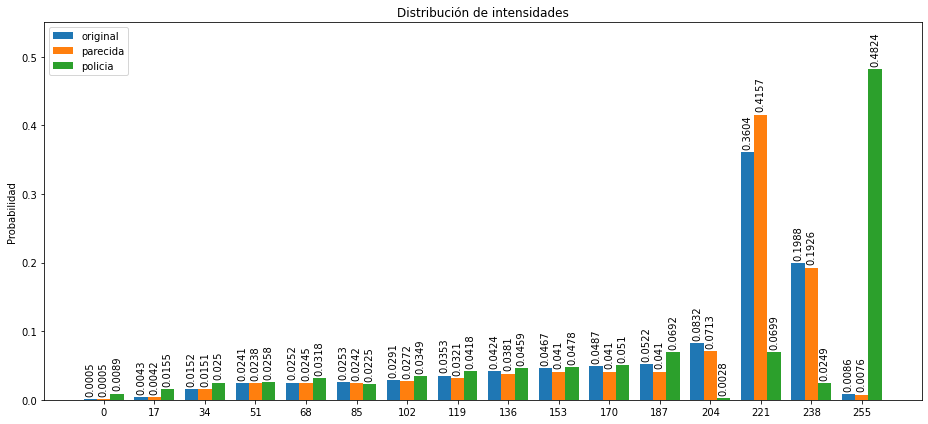

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def autolabel(rects,ax):
    for rect in rects:
      height = round((float)(rect.get_height()),4)
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',fontsize=10,rotation=90)
        
def histogram_multiple(distribucion1,label1,distribucion2,label2,distribucion3,label3):
    
    #ordenamos los diccionarios por clave (intensidades)
    d1 = OrderedDict(sorted(distribucion1.items()))
    d2 = OrderedDict(sorted(distribucion2.items()))
    d3 = OrderedDict(sorted(distribucion3.items()))
    b = OrderedDict(sorted(distribucion_original.items()))

    #obtenemos las intensidades a partir de cualquier diccionario
    intensidades = list(d1.keys())
    
    #obtenemos los valores
    d1_valores = list(d1.values())
    d2_valores = list(d2.values())
    d3_valores = list(d3.values())


    ind = np.arange(len(intensidades))  # the x locations for the groups
    width = 0.525  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar((ind - width/2)*2, d1_valores, width,
                    label=label1)
    rects2 = ax.bar((ind)*2, d2_valores, width,
                    label=label2)
    rects3 = ax.bar((ind + width/2)*2, d3_valores, width,
                    label=label3)
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probabilidad')
    ax.set_title('Distribución de intensidades')
    ax.set_xticks(ind*2)
    ax.set_xticklabels(intensidades)
    ax.legend()
    
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    fig.tight_layout()

    plt.show()
    
histogram_multiple(distribucion_original,'original',distribucion_parecida,'parecida',distribucion_policia,'policia')

In [51]:
import math

def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    return math.sqrt(varianza)

distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")
    

Dist original
189.9449923664122
55.70177307571604
************
Dist parecida
192.4244961832061
55.15561366734102
************
Dist policia
195.15137404580153
73.83400301980652
************


3. Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original). Con dicho algoritmo codificador:
    - a) Comprimir con Huffman semi-estático la imagen original.
    - b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
    - c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
    - d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para  la propia imagen. Comparar con el resultado del inciso anterior.
    - e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d).
Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [52]:
class Tree:
    simbolo = None
    prob = None
    left = None
    right = None
    def __init__(self,simbolo=None, prob=None, left=None, right=None):
      self.simbolo = simbolo
      self.prob = prob
      self.left = left
      self.right = right

    def is_leaf(self):
      return (self.left is None and self.right is None) 

    #def get_leaves(self):
    #  return self.__leaves(self)

    def get_leaves(self):
      if self.is_leaf():
        return [self]
      else:
        aux = []
        if self.left is not None:
          aux += self.left.get_leaves()
        if self.right is not None:
          aux += self.right.get_leaves()
        return aux

    def __repr__(self):
      return "<%s,%s>" % (self.simbolo, self.prob)

    def __str__(self):
      return "<%s,%s>" % (self.simbolo, self.prob)

In [53]:
def get_mas_chicos(arr):
  nodo1 = arr[0] # el valor mas chico
  nodo2 = arr[1] # el segundo mas chico
  i = 2
  while i < len(arr):
    if arr[i].prob < nodo1.prob :
      nodo2 = nodo1
      nodo1 = arr[i]
    elif arr[i].prob < nodo2.prob :
      nodo2 = arr[i]
    i += 1
  return nodo1,nodo2

#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
  for hoja in nodo1.get_leaves() :
    codigos[hoja.simbolo] = '0' + codigos[hoja.simbolo]
  for hoja in nodo2.get_leaves() :
    codigos[hoja.simbolo] = '1' +codigos[hoja.simbolo]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
  nodos.remove(nodo1)
  nodos.remove(nodo2)
  grupo = Tree("grupito",nodo1.prob+nodo2.prob,nodo2,nodo1)
  nodo1.parent = grupo
  nodo2.parent = grupo
  return grupo

#Genera el codigo de huffman y su arbol correspondiente
def generar_codigo_huffman(dist):
  nodos = []
  codigos = {}
  for key in dist:
    nodos.append(Tree(key,dist[key]))
    codigos[key] = ""
  while len(nodos) != 1:
    nodo1, nodo2 = get_mas_chicos(nodos)
    grupo = fusionar_nodos(nodos,nodo1,nodo2)
    actualizar_codigos(codigos,nodo1,nodo2)
    nodos.append(grupo)
  return codigos,nodos[0]

In [54]:
codigos_will_original,arbol_will_original=generar_codigo_huffman(distribucion_original)

def print_arbol(nodo, level):
    if nodo.is_leaf():
        print("----"*level + "   => "+ str(nodo.simbolo) + " | " + str(nodo.prob))
    else:
        level = level+1
        print("----"*level + "1")
        print_arbol(nodo.left,level)
        print("----"*level + "0")
        print_arbol(nodo.right,level)
    
print_arbol(arbol_will_original,0)
print(codigos_will_original)

----1
--------1
--------   => 238 | 0.19880422092501124
--------0
--------   => 221 | 0.360416255051639
----0
--------1
------------1
----------------1
----------------   => 204 | 0.08321239335428827
----------------0
--------------------1
--------------------   => 119 | 0.03527929950606197
--------------------0
--------------------   => 102 | 0.029128423888639426
------------0
----------------1
--------------------1
------------------------1
------------------------   => 34 | 0.015194881005837449
------------------------0
----------------------------1
----------------------------   => 255 | 0.008626852267624607
----------------------------0
--------------------------------1
--------------------------------   => 17 | 0.004271216883700045
--------------------------------0
--------------------------------   => 0 | 0.00047373147732375395
--------------------0
--------------------   => 85 | 0.025297709923664122
----------------0
----------------   => 187 | 0.05222900763358779
--------0
---

In [64]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
    # que este tipo de dato tiene 8 bits)
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        byte = chr(int(''.join([str(bit) for bit in ocho_bits]), 2))
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # la convierto en un único string
    data_en_un_unico_string = ''.join(lista_de_bytes)

    # y los escribo en mi archivo como datos en bytes
    with open('mi_archivo.teoinfo', 'wb') as f:
        f.write(bytearray(data_en_un_unico_string, encoding='utf-8'))
        
    return lista_de_bytes
    """
    # vamos a ir armando una lista de bytes (que vamos a representar con chars, ya
    # que este tipo de dato tiene 8 bits)
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        byte = chr(int(''.join([str(bit) for bit in ocho_bits]), 2))
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # la convierto en un único string
    data_en_un_unico_string = ''.join(lista_de_bytes)
    
    print("Numero de bytes: ", str(len(lista_de_bytes)))
    print("Numero de bits: ", str(len(lista_de_bits)))
    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'w') as f:
        f.write(data_en_un_unico_string)
        
    return lista_de_bytes
    """

In [63]:
def leer_bits_de_archivo(nombre_archivo):
    """
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'r') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break
    
    print("Numero de bytes: ", str(len(lista_de_bytes)))
    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    print("Numero de bits: ", str(len(result)))
    
    return result, lista_de_bytes
    """
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open('mi_archivo.teoinfo', 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    return result, lista_de_bytes


In [65]:
print(codigos_will_original)

def generar_codigo(imagen,codigo):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigo[imagen[i][j]]:
                codificacion.append(c)
    return codificacion

codificacion_original = generar_codigo(will_original, codigos_will_original)

{221: '10', 238: '11', 204: '0111', 187: '0100', 170: '0010', 153: '0001', 136: '0000', 119: '01101', 255: '0101101', 102: '01100', 85: '01010', 68: '00111', 51: '00110', 34: '010111', 17: '01011001', 0: '01011000'}


In [66]:
bytes_guardados = guardar_bits_a_archivo(codificacion_original, "original.teoinfo")#861800


In [67]:
bits, bytes_leidos = leer_bits_de_archivo("original.teoinfo")

In [ ]:
for i in range(len(codificacion_original)):
    if int(bits[i]) != int(codificacion_original[i]):
        import pdb; pdb.set_trace()

> <ipython-input-68-686e0089f094>(1)<module>()
-> for i in range(len(codificacion_original)):
(Pdb) i
1
(Pdb) bits[i]
1
(Pdb) codificacion_original[i
*** SyntaxError: unexpected EOF while parsing
(Pdb) codificacion_original[i]
'0'
(Pdb) bytes_guardados[0]
'ª'
(Pdb) bytes_leidos[0]
b'\xc2'
(Pdb) ord(bytes_leidos[0])
194
(Pdb) ord(bytes_guardados[0])
170


In [60]:
bits_extra = 0

def decodificar_valores(raiz, datos, ancho, alto):
    imagen = [[]]
    index_datos = 0
    index_columna = 0
    index_fila = 0
    arbol = raiz
    while index_fila < alto and index_datos < len(datos):            
        if index_columna >= ancho:
            index_fila += 1
            imagen.append([])
            index_columna = 0
                    
        while arbol.is_leaf() == False and index_datos < len(datos):
            if int(datos[index_datos]) == 1:
                arbol = arbol.left
            else:
                arbol = arbol.right
            index_datos += 1
        
        imagen[index_fila].append(arbol.simbolo)
        index_columna += 1
        arbol = raiz
        
        if index_datos % 100000 == 0:
            print(str(index_datos),' de ',str(len(datos)))
    return imagen

    """
    imagen = [[]]
    arbol = raiz
    index = 0
    while index != len(datos):
        if(arr[i]=='1'):
          arbol = aux.left
        else:
          arbol = aux.right
        if(aux.is_leaf()):
          imagen[i/ancho].append(arbol.simbolo)
          aux = arbol
        i += 1
    return imagen
    """
    
imagen = decodificar_valores(arbol_will_original, bits, len(will_original[0]), len(will_original))

100000  de  6894400
400000  de  6894400
600000  de  6894400
1100000  de  6894400
1500000  de  6894400
1600000  de  6894400
2000000  de  6894400
2300000  de  6894400
2500000  de  6894400
2700000  de  6894400
3700000  de  6894400
4100000  de  6894400
4800000  de  6894400
4900000  de  6894400
5800000  de  6894400
6400000  de  6894400
6500000  de  6894400
6700000  de  6894400


In [61]:
"""
for i in range(len(imagen)):
    for j in range(len(imagen[0])):
        if imagen[i][j] != will_original[i][j]:
            print(imagen[i][j], will_original[i][j])
            """

85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
85 119
0 221
221 238
136 221
85 170
153 119
187 136
204 153
204 187
170 204
102 204
85 170
85 102
119 85
153 85
187 119
187 153
170 187
187 170
153 187
119 187
102 153
102 119
119 102
136 102
136 119
119 136
119 136
136 119
136 119
153 136
136 153
119 136
136 119
102 136
119 136
170 102
221 119
221 170
170 221
153 221
119 170
102 153
136 102
136 119
119 136
102 136
136 119
136 102
119 136
102 136
136 102
119 136
102 119
102 119
119 102
119 102
102 119
85 119
85 102
102 85
136 8

221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
221 238
204 221
204 221
221 204
204 221
187 204
187 204
204 187
221 187
221 204
204 221
170 221
153 204
204 153
221 170
221 204
204 221
204 221
221 204
221 204
204 221
204 221
187 204
187 204
170 187
153 187
221 153
221 170
204 221
238 204
187 238
153 221
153 187
170 153
170 153
187 170
204 170
221 187
221 204
204 221
204 221
238 204
238 204
221 238
187 238
153 221
136 187
102 153
102 136
119 102
136 102
136 119
187 136
204 136
238 187
238 204
204 238
170 238
170 204
204 170
204 170
187 204
170 204
153 187
136 170
170 136
170 153
187 170
204 170
204 187
187 204
187 204
204 187
221 187
170 221
136 204
153 170
221 136
255 153
204 221
153 255
136 204
204 136
221 153
187 204
170 221
153 187
153 170
187 153
170 153
136 187
153 170
170 136
187 153
204 170
119 204
102 187
153 102
153 119
204 153
238 153
238 204
204 238
170 238
153 204
153 170
136 153


85 119
102 85
119 102
136 102
85 136
102 119
136 85
170 102
170 136
153 170
119 170
102 153
136 119
170 102
187 136
238 170
204 187
170 238
119 204
85 170
170 85
204 119
187 170
136 204
102 187
119 136
136 102
136 119
119 136
102 136
102 119
119 102
119 102
153 119
170 119
170 153
153 170
119 170
102 153
85 119
85 102
119 85
136 85
136 119
153 136
153 136
136 153
136 153
153 136
136 153
153 136
170 136
170 153
102 170
102 170
170 102
187 102
136 170
51 187
68 136
153 51
187 68
170 153
136 187
102 170
102 136
119 102
136 102
85 119
119 136
136 119
153 119
187 136
170 153
119 187
102 170
153 102
136 119
102 153
102 136
153 102
221 102
221 153
187 221
153 221
153 187
170 153
187 153
187 170
170 187
170 187
204 170
187 170
136 204
119 187
170 119
187 136
136 187
85 170
153 119
153 136
136 153
136 153
119 136
153 136
170 119
187 153
187 170
170 187
170 187
153 170
153 170
187 153
221 153
221 187
170 221
136 221
136 170
187 136
204 136
204 187
221 204
221 204
204 221
170 221
136 204
153 170


221 187
204 221
187 204
187 204
204 187
204 187
221 204
204 221
221 204
187 221
170 204
221 170
221 187
204 221
187 221
187 204
170 187
170 187
187 170
187 170
204 187
221 187
204 221
221 204
221 204
187 221
170 221
170 187
153 170
153 170
170 153
204 153
221 170
221 204
187 221
170 221
170 187
204 170
221 170
170 221
119 204
102 170
170 102
238 119
238 170
221 238
204 238
204 221
187 204
187 204
170 187
136 187
119 170
153 136
187 119
170 153
136 187
136 170
170 136
204 136
221 170
221 204
204 221
187 221
170 204
153 187
153 170
187 153
204 153
204 187
221 204
238 204
204 221
136 238
102 204
153 136
170 102
170 153
136 170
136 170
153 136
170 136
170 153
153 170
136 170
119 153
153 119
170 136
170 153
187 170
187 170
170 187
153 187
153 170
170 153
187 153
187 170
204 187
153 204
102 187
85 153
85 102
136 85
187 85
187 136
170 187
187 170
204 187
170 187
119 204
102 170
153 119
187 102
170 153
119 187
102 170
119 102
136 119
170 119
187 136
136 187
119 170
102 136
102 119
119 102
153 

153 102
153 85
170 119
170 153
204 153
204 170
187 170
170 204
153 204
153 187
170 153
153 170
136 170
102 153
102 153
119 136
153 102
170 102
153 119
119 153
119 170
136 153
136 119
153 119
170 136
170 136
170 153
187 170
153 170
153 187
187 170
221 153
221 153
204 187
170 221
153 221
170 204
204 170
221 153
221 170
221 204
204 221
187 221
153 221
136 204
153 187
187 153
204 136
221 153
204 187
187 221
187 204
221 187
221 187
153 221
136 221
136 204
187 136
204 136
221 153
204 187
204 221
221 204
221 204
187 204
170 221
153 221
153 187
204 153
204 153
204 170
221 204
221 204
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
204 221
204 221
221 204
238 204
221 204
170 221
136 238
136 221
204 136
221 136
204 170
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
221 204
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
2

170 153
187 136
221 153
187 170
136 187
102 221
136 187
170 136
170 102
136 170
153 170
153 136
153 136
170 153
170 153
170 153
153 170
136 170
119 170
187 136
187 119
85 187
68 187
85 153
170 85
238 68
221 85
136 170
136 238
170 221
204 136
204 136
136 170
85 204
136 204
170 136
170 119
153 136
153 170
153 170
170 153
170 153
170 153
136 170
102 170
119 170
119 136
136 102
153 119
170 119
170 136
136 170
85 170
119 153
119 136
153 119
153 119
119 153
102 153
136 119
170 119
170 102
170 136
153 170
136 170
119 170
102 153
119 136
153 119
170 102
170 119
136 170
119 170
102 153
119 136
85 119
68 102
85 119
119 85
136 68
153 85
187 119
221 136
187 153
136 187
85 221
68 187
119 136
153 85
170 68
136 119
68 153
51 170
85 136
136 68
153 51
153 85
170 136
170 153
153 170
119 170
102 153
136 153
153 119
170 102
119 136
102 153
102 170
102 119
119 102
136 119
153 102
136 102
119 136
102 153
102 136
102 119
119 102
153 102
170 102
153 119
119 153
136 170
170 119
170 136
170 153
187 170
153 170


119 85
170 34
170 51
85 170
119 170
170 119
170 85
136 119
119 170
119 170
187 119
204 119
187 136
136 187
119 204
102 187
119 136
187 119
221 102
204 119
170 187
136 221
119 204
153 170
187 136
204 119
170 153
153 187
136 204
136 170
136 153
153 136
170 136
187 136
119 170
102 187
136 153
170 119
170 102
119 170
136 170
136 119
153 136
187 136
204 136
187 153
153 187
136 204
136 187
170 153
187 136
204 136
204 170
204 187
187 204
204 187
221 204
221 204
187 221
153 221
170 204
187 153
170 187
221 170
221 170
221 187
204 221
204 221
204 221
221 204
221 204
204 221
204 221
187 204
187 204
187 204
204 187
204 187
204 187
221 204
187 221
187 204
187 204
204 187
204 187
204 187
221 204
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
204 221
204 221
221 204
238 204
221 204
187 221
136 238
136 221
221 136
238 136
221 187
204 221
204 238
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
221 204
204 221
204 221
221 2

204 221
221 204
204 221
221 204
221 204
221 204
204 221
221 204
238 221
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
221 238
204 221
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
204 221
204 221
221 204
221 204
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
204 221
187 204
221 204
238 187
238 204
204 221
153 238
119 238
136 204
170 153
204 119
204 136
204 170
187 204
170 204
187 204
187 170
204 187
221 187
204 187
204 221
221 204
221 204
221 204
204 221
187 221
187 221
187 204
170 187
153 187
153 187
187 153
187 153
187 170
204 187
204 187
221 187
221 204
221 204
204 221
204 221
204 221
187 204
187 204
204 187
221 187
187 204
170 221
170 204
170 187
153 170
187 170
204 153
204 170
204 187
187 204
153 204
170 204
204 153
204 170
204 187
187 204
187 204
170 204
170 187


187 204
170 204
153 187
153 187
153 170
187 153
204 153
204 153
221 187
221 204
187 204
170 221
170 221
204 170
221 170
204 187
204 221
187 204
170 204
153 204
136 187
119 170
119 153
170 119
170 119
187 136
204 170
221 170
221 187
221 204
204 221
187 221
204 221
221 204
153 204
153 221
153 187
136 153
136 153
170 136
204 136
204 153
204 170
221 204
187 204
153 221
153 204
170 187
187 153
170 153
187 170
153 170
102 187
51 187
68 153
153 102
204 51
187 68
170 153
204 187
221 170
221 204
170 204
102 221
85 221
136 170
170 102
153 85
153 136
136 153
102 153
85 170
102 136
153 102
187 85
187 102
170 153
204 187
136 187
102 204
119 170
136 102
153 119
170 136
170 136
170 153
136 170
153 170
170 136
170 153
187 170
187 170
153 170
102 187
102 187
136 153
204 102
221 102
204 136
187 221
153 204
136 204
119 187
119 153
187 136
221 119
204 119
136 187
102 221
102 204
119 136
153 102
153 102
170 119
136 153
136 170
170 136
204 136
170 153
119 170
102 204
136 170
204 119
170 102
119 136
68 204
1

153 119
119 153
102 170
119 153
153 119
204 102
238 119
221 153
187 204
170 238
170 221
136 187
119 170
119 170
102 136
102 119
153 102
170 102
170 119
153 170
136 170
136 153
170 136
153 136
153 170
136 153
119 153
102 153
119 136
153 119
153 102
153 119
170 153
170 153
119 170
102 170
119 153
136 119
136 102
153 119
170 136
187 136
187 153
153 170
136 187
153 187
170 153
187 136
119 170
119 187
136 119
102 119
136 153
119 102
119 136
153 136
170 119
153 119
170 153
102 170
102 170
119 153
136 102
153 102
170 119
170 136
136 153
136 170
153 170
136 153
119 136
119 136
119 136
153 119
170 119
170 119
136 170
119 170
102 153
119 136
153 119
187 102
221 119
187 153
170 187
153 221
153 187
153 170
170 153
170 153
119 170
136 170
170 153
204 119
204 136
153 170
119 204
119 204
119 153
153 119
170 119
187 119
187 153
170 187
187 170
204 170
221 187
204 187
187 221
153 204
153 204
204 153
221 153
221 187
204 221
187 221
187 204
187 204
204 187
204 187
204 187
221 204
221 204
221 204
204 221


204 221
187 204
187 204
187 204
204 187
204 187
221 187
221 204
221 204
170 221
136 221
136 221
187 170
221 136
221 136
221 187
204 221
204 221
204 221
221 204
204 221
221 204
221 204
221 204
204 221
204 221
187 221
187 204
187 204
204 187
221 187
221 187
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
238 204
187 221
153 238
170 204
204 153
221 170
221 187
221 204
204 221
204 221
204 221
221 204
221 204
204 221
204 221
221 204
221 204
221 204
204 221
221 204
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
204 221
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
204 221
204 221
221 204
204 221
187 204
204 187
187 204
221 204
221 187
221 204
170 221
136 221
119 221


238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
204 221
204 221
204 221
221 204
221 204
204 221
221 204
221 204
204 221
204 221
221 204
221 204
204 221
204 221
221 204
204 221
204 221
221 204
204 221
221 204
204 221
221 204
238 204
221 204
187 221
153 238
119 221
136 187
187 153
204 119
204 136
187 204
187 204
204 187
221 187
221 187
170 221
170 221
187 204
204 170
187 170
170 187
170 204
170 187
187 170
187 170
204 170
204 187
221 187
204 221
221 204
221 204
221 204
204 221
204 221
187 221
187 204
187 204
204 187
204 187
204 187
187 204
187 204
204 187
204 187
187 204
187 204
187 204
204 187
204 187
204 187
187 204
187 204
187 204
170 187
187 170
170 187
170 187
204 170
221 170
221 187
187 204
170 221
170 221
170 187
187 170
204 170
187 170
153 187
119 204
136 187
187 119
187 136
221 153
221 187
204 187
204 221
221 204
187 204
170 221
153 221
136 187
153 170


204 187
221 187
204 187
187 221
221 187
221 204
204 221
204 221
187 204
204 187
187 204
187 204
187 204
204 187
204 187
204 187
187 204
187 204
204 187
204 187
187 204
187 204
187 204
170 187
153 187
136 187
119 170
119 153
153 136
187 119
204 119
221 153
204 187
204 221
187 204
221 187
221 204
187 221
170 221
153 204
136 187
136 170
136 153
153 136
153 136
170 136
187 153
187 153
187 170
170 187
170 187
204 170
204 170
170 187
136 204
136 204
136 170
153 136
170 136
187 136
187 153
204 170
204 187
204 187
153 204
102 204
85 204
85 153
136 85
153 85
119 102
136 153
153 119
153 136
170 136
187 153
204 153
221 170
221 187
119 221
85 221
85 204
102 119
136 85
170 85
170 102
119 136
136 170
153 170
170 119
187 136
187 153
187 170
170 187
136 187
119 187
119 170
153 136
187 119
187 119
153 187
153 187
136 153
119 153
119 153
153 136
187 119
187 119
119 187
136 187
170 153
187 119
187 136
187 170
153 187
153 187
170 187
187 153
204 153
204 170
170 204
119 204
85 187
68 170
102 119
153 85
170

85 153
85 136
102 136
153 85
204 85
238 102
204 153
136 204
102 238
102 204
102 136
68 102
170 102
204 68
204 102
187 170
136 204
119 204
136 187
170 136
153 119
153 136
136 170
170 153
170 136
170 153
153 170
153 170
153 170
170 153
136 153
136 170
187 153
204 136
170 136
119 187
136 204
204 119
238 136
221 170
170 204
119 238
102 221
119 170
136 119
136 102
153 119
170 136
170 136
136 170
153 170
170 153
187 136
221 153
221 170
204 187
204 221
204 221
187 204
153 204
136 204
170 187
221 153
221 136
187 170
170 221
170 221
204 170
204 170
204 187
221 204
204 221
221 204
204 221
221 204
204 221
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
187 221
153 221
153 221
221 153
221 153
221 187
204 221
204 221
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
204 221
221 204
204 221
221 204
238 221
221 238
238 221
238 221
238 221
221 238
221 23

204 221
204 221
204 221
187 204
187 204
204 187
221 187
204 221
221 204
238 204
153 221
136 238
136 204
170 153
170 136
170 136
187 170
187 170
153 187
153 187
153 170
204 153
204 153
204 153
170 204
170 204
187 204
204 170
204 170
204 187
221 204
204 221
221 204
221 204
204 221
204 221
187 204
187 204
187 204
204 187
204 187
204 187
221 204
221 204
204 221
187 221
187 204
187 204
204 187
204 187
221 187
221 204
204 221
204 221
187 204
187 204
187 204
204 187
204 187
204 187
221 204
221 204
204 221
204 221
221 204
204 221
187 204
187 204
187 204
204 187
204 187
221 187
187 204
170 221
170 204
153 187
136 170
136 170
170 153
187 136
187 136
187 170
204 187
204 187
221 187
221 204
187 204
187 221
170 221
153 187
153 187
153 170
170 153
204 153
221 153
204 170
170 204
153 221
153 204
170 153
187 153
221 170
221 170
204 187
187 221
153 221
136 204
136 187
170 136
187 136
187 153
187 170
204 187
204 187
153 204
153 204
204 153
221 153
204 187
204 221
187 204
136 204
102 204
102 187
153 102


119 187
136 119
187 119
204 136
204 187
187 204
170 204
170 187
187 170
187 170
204 187
204 187
170 204
136 204
136 170
119 136
102 136
102 119
153 102
221 102
204 153
187 221
153 204
136 187
170 136
187 153
153 187
153 170
136 153
68 153
51 136
119 68
221 51
255 119
204 221
170 255
170 204
187 170
153 187
136 170
85 153
119 136
136 119
102 119
68 136
170 68
204 102
187 170
187 204
204 187
204 187
187 204
153 204
136 187
136 153
153 136
187 136
119 187
85 153
136 119
204 85
221 136
221 204
204 221
204 221
187 204
170 204
221 170
204 187
153 221
136 204
187 136
187 153
136 187
119 187
153 136
170 119
187 153
153 170
119 187
102 153
136 102
136 119
170 136
153 136
153 170
136 153
170 136
170 153
153 170
153 170
136 153
119 153
119 136
136 119
153 119
153 136
170 153
187 153
153 187
153 170
170 153
136 153
85 170
170 136
204 119
221 170
170 221
153 204
136 170
136 153
187 136
153 136
102 187
119 153
187 102
221 119
170 187
85 221
85 170
136 85
170 85
170 136
136 170
136 170
119 136
85 136

153 204
153 170
170 153
187 153
204 170
204 187
187 204
187 204
204 187
204 187
221 204
221 204
204 221
204 221
221 204
221 204
204 221
204 221
221 204
221 204
204 221
187 221
170 204
187 170
204 187
204 187
221 204
187 204
170 221
170 187
187 170
204 170
221 187
204 221
187 204
187 204
170 187
170 187
187 170
204 170
221 187
187 221
170 204
153 187
153 170
170 153
187 153
221 170
221 187
204 221
187 221
187 204
204 187
204 187
187 204
204 187
187 204
187 204
204 187
221 187
170 221
153 204
170 153
136 170
136 170
153 136
153 136
136 153
187 136
204 153
204 187
187 204
187 204
204 187
204 187
187 204
170 204
153 187
153 170
136 153
136 153
170 136
204 136
204 170
221 204
187 221
136 204
102 187
119 136
153 102
136 119
119 153
119 136
170 119
204 119
136 204
119 170
119 136
136 119
187 119
204 136
170 204
153 187
119 170
102 153
136 102
153 119
119 153
153 119
153 136
136 153
119 153
119 136
153 119
187 119
170 153
153 187
153 170
170 153
170 153
187 170
153 187
136 170
136 153
153 136


136 119
136 119
153 119
187 119
187 136
170 136
153 187
170 187
187 170
221 170
221 153
187 153
136 187
119 221
102 221
119 187
170 136
221 119
238 102
204 119
153 221
187 238
221 204
221 170
204 153
170 187
170 221
187 221
187 204
119 170
85 170
102 187
119 187
136 119
136 85
136 102
136 119
102 136
85 136
119 136
170 136
204 102
170 85
68 170
85 204
153 170
187 119
187 68
170 85
170 153
153 221
153 221
170 187
187 170
187 153
187 153
187 170
153 187
102 187
85 187
119 170
221 153
187 102
187 85
204 119
204 187
187 221
204 187
221 204
170 204
136 187
136 187
136 204
136 221
153 170
187 136
221 136
204 136
204 136
187 153
204 221
187 204
170 187
170 187
187 204
170 204
119 187
85 170
102 170
119 187
153 170
153 119
136 85
119 102
153 119
153 136
153 119
187 153
204 153
187 153
170 153
153 187
153 204
136 187
119 170
119 153
119 153
119 153
153 136
187 119
204 119
221 119
204 119
170 153
153 187
153 204
187 221
221 204
221 170
204 153
187 153
204 221
204 221
136 187
119 204
119 204
153 

187 119
187 136
187 136
204 170
187 221
170 187
170 187
170 187
153 204
136 204
102 187
102 170
119 170
136 170
136 153
136 102
153 102
153 119
153 136
119 136
170 153
187 153
170 153
153 119
153 136
170 136
187 170
170 187
136 170
119 153
119 153
153 170
153 187
136 170
136 119
204 119
238 153
187 153
153 136
170 136
187 204
204 238
204 187
204 136
204 153
187 170
187 204
221 204
187 204
170 187
153 187
153 187
153 204
136 221
136 187
136 170
136 153
136 153
153 136
153 136
119 136
119 136
170 153
136 153
136 119
153 119
153 136
136 170
119 153
119 153
153 136
204 153
221 136
187 136
136 119
136 153
187 204
170 221
221 136
221 119
204 136
153 170
153 187
170 221
136 221
102 204
102 187
136 153
187 153
136 102
136 102
136 187
153 170
153 136
119 136
119 136
170 136
187 153
187 153
153 136
136 119
119 170
170 187
170 187
136 153
85 136
153 119
187 170
136 119
153 119
170 187
187 136
204 136
204 153
170 153
136 170
102 170
119 187
187 204
187 204
136 170
170 102
221 119
221 187
153 187
1

136 187
136 204
136 153
119 136
153 136
170 136
170 136
153 136
153 119
136 170
136 170
136 153
153 136
119 153
170 136
187 136
221 153
221 153
221 119
187 136
136 170
153 187
170 221
153 221
136 221
136 187
153 136
187 153
187 170
238 153
238 136
187 136
136 153
102 187
102 187
102 238
119 238
153 187
187 136
187 102
153 102
136 102
102 119
119 153
119 187
119 187
102 153
170 102
187 119
187 119
170 119
136 102
119 136
102 170
102 187
102 187
119 170
187 136
238 119
238 102
204 102
153 102
119 187
153 238
170 238
153 204
119 153
136 119
136 170
187 119
221 119
204 136
170 153
238 187
255 221
187 204
102 153
85 136
102 170
170 238
221 255
221 187
153 102
102 85
119 102
136 170
136 221
153 221
187 153
221 102
221 119
187 136
170 136
187 153
204 187
187 221
170 221
153 187
153 170
136 187
119 204
119 187
221 153
238 153
204 136
204 119
204 119
204 170
204 221
204 238
221 204
221 204
204 221
204 221
187 204
204 187
221 204
221 204
204 221
204 221
221 204
221 204
221 204
221 204
221 204
22

119 187
170 187
204 136
204 136
153 170
153 119
221 204
187 204
153 170
136 153
136 170
136 221
102 187
68 153
51 153
102 153
187 136
221 136
221 136
153 102
136 68
85 51
68 102
136 187
187 221
170 221
187 153
187 136
153 85
136 68
153 136
170 187
187 170
170 187
170 153
170 136
187 153
204 170
170 187
136 187
119 170
136 170
187 170
170 204
153 170
153 136
170 119
187 136
187 170
187 153
187 153
187 170
170 187
170 187
153 187
119 187
136 187
170 187
136 170
102 170
102 187
136 153
153 119
102 170
51 136
34 102
68 102
119 136
136 153
85 136
51 102
68 51
102 34
119 68
102 119
85 136
136 85
221 51
238 68
204 102
204 119
204 102
187 85
204 136
204 221
204 238
187 204
187 204
170 204
170 187
187 204
153 204
119 204
153 187
153 187
136 170
119 170
136 187
170 153
187 119
187 153
170 153
204 136
221 119
204 136
187 170
153 187
136 187
153 170
170 204
170 221
187 204
170 153
170 136
170 153
136 187
136 187
136 170
153 170
119 170
119 170
204 136
238 136
221 170
187 153
187 119
153 119
102 13

204 187
204 187
187 204
187 204
187 204
204 187
204 187
221 187
221 204
187 204
187 204
187 204
204 221
204 221
204 187
204 187
204 187
187 204
187 204
187 204
187 204
136 204
136 204
153 204
170 187
187 136
187 136
187 153
204 170
204 187
221 187
221 187
221 187
204 187
187 204
153 187
170 204
204 221
204 221
204 187
187 153
187 170
170 204
187 221
170 204
119 187
119 187
136 170
153 187
170 204
187 204
153 119
153 119
187 136
204 153
204 170
204 187
204 170
204 153
221 153
221 187
187 204
170 204
187 204
153 221
136 221
170 187
153 187
136 204
136 204
136 153
153 136
119 170
119 170
136 153
153 136
187 136
204 136
187 153
170 119
153 119
136 153
153 187
153 204
170 187
153 170
187 136
204 136
170 153
119 153
68 170
51 153
51 153
136 187
221 204
221 170
187 119
153 68
170 51
204 51
68 221
85 221
153 187
204 153
238 170
153 204
153 136
153 68
170 85
187 153
187 204
170 238
170 153
170 153
170 153
204 187
221 170
204 170
187 170
136 170
119 170
136 187
170 204
204 221
187 136
170 119
17

221 255
238 255
221 204
221 136
221 102
221 136
221 187
221 238
238 221
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
187 204
187 204
170 204
187 204
187 204
221 204
221 187
204 187
187 170
204 187
204 187
221 204
204 221
204 221
170 204
170 187
136 204
119 204
136 221
187 204
221 204
238 170
204 170
187 136
170 119
153 136
170 187
187 221
204 238
221 204
204 187
204 170
204 153
204 170
204 187
204 221
221 204
221 204
187 204
170 204
170 204
187 204
187 221
204 221
187 204
204 187
204 170
204 170
204 187
204 187
204 187
221 204
187 204
187 204
187 204
204 221
204 187
204 187
221 187
187 204
187 204
204 221
204 187
204 187
187 204
187 204
204 187
204 187
187 204
170 204
153 204
136 204
153 204
187 204
221 204
221 187
204 170
204 153


238 221
238 221
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
221 238
238 221
221 238
204 221
204 221
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
221 204
204 221
204 221
204 221
221 204
204 221
204 221
204 221
204 221
221 204
221 204
204 221
204 221
187 221
187 204
187 204
187 204
204 187
153 204
136 187
170 187
221 204


119 187
187 153
221 170
221 187
204 187
204 119
204 102
187 119
170 187
187 221
170 221
153 204
136 204
136 204
119 187
102 170
119 187
119 170
102 153
153 136
153 119
170 102
204 119
238 119
204 102
170 136
170 153
221 170
221 204
187 238
153 204
136 170
170 153
204 170
204 221
187 221
136 187
85 153
119 136
153 170
153 204
119 204
119 187
187 136
221 119
238 119
204 153
136 119
153 119
204 187
204 221
187 238
187 204
187 153
170 136
170 153
153 204
170 204
170 187
170 187
170 187
204 170
187 170
136 153
102 170
136 170
136 204
136 187
153 136
170 102
153 136
136 170
136 170
153 136
153 136
136 170
119 153
119 136
153 136
187 153
187 153
136 119
153 119
187 153
204 187
221 187
204 153
204 136
204 136
187 153
170 187
153 204
153 221
153 204
153 204
136 204
153 187
170 153
187 153
204 136
119 170
153 170
204 153
221 153
221 187
221 204
170 153
85 119
51 153
85 204
136 221
187 221
204 221
153 85
153 51
170 85
187 136
119 187
85 204
102 170
119 153
136 153
153 170
170 187
170 119
170 85
2

238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
204 221
221 204
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
221 204
204 221
204 221
204 221
204 221
204 221
221 204
204 221
187 204
187 204
187 204
187 204
221 204
204 187
221 187
221 204
204 221
187 204
170 187
153 187
170 204
187 221
204 221
204 187
204 170
204 153
153 187
170 204
221 204
204 170
204 153
204 170
204 221
221 204
187 204
170 204
187 204
221 204
187 170
204 221
204 187
221 187
204 187
187 221
170 204
187 204


204 170
221 187
204 221
204 221
187 204
170 204
170 204
187 221
221 204
221 204
221 204
221 187
204 170
204 170
204 187
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
187 221
153 204
170 204
187 204
221 187
221 153
204 170
187 221
153 221
153 221
187 221
221 204
221 187
204 187
204 153
204 153
221 187
204 221
204 221
204 221
221 204
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
238 204
255 204
153 221
102 221
102 221
136 204
187 238
221 255
221 153
221 102
221 102
221 136
238 187
221 238
238 221
238 221
221 238
221 238
238 221
221 238
238 221
221 238
238 221
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238


153 221
187 204
170 204
153 204
153 221
170 187
170 153
170 153
170 187
170 204
153 170
119 153
136 153
153 170
153 170
102 170
102 170
221 153
221 119
204 136
187 153
187 153
187 102
187 102
187 170
187 221
187 221
187 204
204 187
204 187
204 187
221 187
204 187
153 187
153 187
170 204
153 204
136 204
119 221
153 204
170 187
170 153
136 153
102 170
102 153
170 119
170 153
136 170
119 170
136 102
153 102
187 136
204 170
204 170
170 136
136 119
153 136
170 136
187 153
221 187
187 204
204 170
204 136
204 153
221 170
221 187
187 221
153 204
170 187
187 204
187 221
187 221
204 153
238 170
221 204
153 204
119 187
136 187
204 187
221 187
238 204
221 238
187 221
136 153
102 119
85 136
85 204
102 221
136 238
136 221
153 187
153 136
136 102
119 85
102 85
136 102
187 136
221 136
221 153
187 153
170 136
170 119
170 102
187 136
204 187
238 221
170 187
119 170
119 170
187 170
221 187
153 238
119 221
136 170
187 119
221 119
204 187
153 221
119 204
221 119
255 136
119 221
85 204
102 153
153 119
221 1

204 187
170 187
170 187
170 204
187 204
170 204
170 187
187 170
204 170
204 170
204 170
204 187
187 170
136 170
119 187
153 187
187 204
170 204
187 204
119 136
51 119
68 153
153 187
221 170
119 204
85 187
102 119
153 51
170 68
68 221
0 187
34 119
102 85
170 102
119 153
68 170
68 153
136 68
204 0
221 34
187 102
187 170
187 119
204 68
187 68
170 136
170 204
170 221
204 187
204 187
204 187
187 204
204 170
204 170
204 170
221 204
221 204
170 204
119 187
102 187
102 204
136 204
170 204
204 221
187 221
187 170
153 119
153 102
153 102
153 136
153 170
153 204
170 187
170 187
119 153
136 153
187 153
204 153
204 153
204 170
204 170
204 153
204 119
204 136
204 187
187 204
170 204
170 204
170 204
187 204
153 204
102 187
102 170
102 170
119 170
170 187
221 204
187 153
187 102
204 102
204 102
187 119
153 204
153 221
136 187
136 187
153 204
153 204
153 187
170 153
170 153
187 136
204 136
204 153
170 153
136 153
119 170
136 170
119 170
102 187
85 204
136 204
187 170
221 136
204 119
187 136
187 119
204

221 136
204 187
170 204
119 187
136 153
187 119
255 153
238 187
170 221
119 204
102 170
136 119
170 136
204 187
221 255
153 238
102 170
170 102
221 136
204 170
136 204
153 221
170 102
187 119
204 170
187 221
170 204
153 136
187 153
204 170
204 187
187 204
153 187
153 170
153 187
153 204
136 204
136 187
187 153
221 153
221 153
204 153
187 153
187 136
204 136
204 153
204 187
204 221
204 221
221 204
204 187
153 204
153 204
187 204
221 204
221 204
204 187
221 153
221 153
204 187
204 221
187 221
170 221
187 204
204 221
204 187
204 170
204 187
204 221
221 204
221 204
204 221
204 221
221 204
221 204
221 204
221 204
204 221
221 204
204 221
221 204
204 221
170 221
153 204
187 204
221 204
221 204
221 204
204 170
170 153
187 221
170 221
187 221
204 221
221 204
204 170
204 187
204 187
221 170
221 187
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
238 204
238 204
204 221
153 221
119 221
119 204
136 204
170 221
221 238
221 204
221 153


204 221
204 221
204 221
221 204
170 204
153 204
170 204
221 204
238 204
204 170
187 153
170 204
153 221
170 238
204 221
238 204
221 204
204 187
204 170
204 170
221 153
221 170
221 204
221 238
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
255 204
255 221
187 221
136 221
119 221
153 204
187 204
204 221
221 255
238 255
221 187
204 136
221 119
221 153
221 187
221 204
221 238
221 204
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238


238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
238 221
221 238
221 238
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
187 221
187 221
204 221
204 221
170 204
153 204
153 204
170 204
204 221
221 204
221 170


119 221
102 204
85 170
119 153
187 153
238 187
170 187
187 153
187 119
187 102
187 85
170 119
170 238
170 204
170 187
153 187
136 187
153 187
187 170
204 187
187 170
204 170
221 170
187 153
153 136
136 153
102 187
85 204
136 187
170 204
136 221
102 187
170 136
204 102
204 85
204 136
204 170
153 136
153 102
187 153
221 170
221 204
187 204
204 170
204 153
204 153
204 187
204 221
187 221
170 204
136 187
136 204
153 204
153 204
153 204
153 204
170 204
170 187
153 170
153 170
136 170
204 136
238 136
221 153
170 153
136 153
187 153
204 136
204 153
221 204
204 238
187 221
187 170
204 136
204 153
204 187
204 221
204 187
204 187
187 204
187 204
187 204
170 204
119 204
119 204
170 204
204 187
204 187
170 187
119 204
102 204
119 170
136 119
187 204
170 204
187 119
153 102
102 119
170 136
204 170
221 187
204 170
204 170
204 187
204 153
221 119
187 102
153 170
119 204
153 221
170 204
153 204
153 204
187 204
153 221
136 187
136 153
136 119
170 153
204 170
221 153
187 153
170 187
187 136
221 136
238 

153 187
170 187
204 170
187 170
153 170
136 153
136 153
170 153
204 153
187 170
170 187
170 204
153 187
153 170
153 204
153 187
136 170
153 170
204 153
204 153
170 136
187 153
204 153
221 136
204 153
204 170
204 136
204 153
204 187
204 221
187 204
221 204
153 204
119 204
136 204
170 204
153 204
119 221
102 204
85 153
102 119
187 204
204 187
204 153
187 119
136 102
119 85
119 102
170 136
204 170
204 187
187 204
204 136
221 119
221 119
204 170
170 204
153 204
136 204
136 187
153 187
187 221
136 204
119 170
221 136
221 136
204 153
153 204
153 221
204 136
221 119
187 153
153 221
119 221
136 204
170 153
187 153
187 204
136 221
136 187
187 119
221 136
221 170
221 187
221 187
170 187
119 136
136 153
170 187
170 221
153 221
136 221
170 221
187 170
221 136
221 119
204 136
136 170
102 153
119 136
187 170
221 187
204 221
187 221
153 204
119 170
119 136
187 102
221 119
221 187
187 221
187 204
221 187
221 153
204 119
204 119
221 187
187 221
170 187
153 187
187 221
221 204
221 204
204 221
204 221
20

187 136
153 136
221 204
221 204
221 204
204 221
204 221
170 153
204 221
204 187
204 170
204 170
204 187
204 221
204 221
187 204
170 204
187 204
204 187
204 170
187 204
187 204
221 204
221 204
204 187
170 187
170 204
187 204
221 204
204 221
204 221
204 187
187 170
170 187
187 204
204 221
204 187
204 170
204 170
204 187
187 204
187 204
187 204
187 204
187 204
221 187
204 187
170 204
153 204
153 204
170 187
170 187
153 187
153 204
170 221
221 170
204 153
170 153
187 170
204 153
221 153
221 170
187 204
187 221
221 170
221 170
153 187
153 204
170 221
204 221
221 187
204 187
204 221
204 221
204 153
204 153
204 170
187 204
153 204
153 204
170 204
187 204
204 221
187 204
136 187
119 153
204 170
204 187
170 204
153 204
153 204
204 136
204 119
204 153
187 204
204 170
187 153
187 153
187 204
187 204
170 204
153 187
170 204
204 187
221 187
170 187
136 187
119 187
119 170
170 153
204 170
221 204
187 221
170 136
187 119
187 119
170 204
187 221
187 204
136 170
102 187
153 187
153 170
102 170
119 187


221 238
221 187
204 136
221 153
221 170
221 187
221 204
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
204 221
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
170 221
153 221
170 204
170 204
187 204
221 204
204 170
170 153
153 170
204 221
187 204
170 153
204 187
204 170
204 170
204 170
204 187
204 221
204 221


238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
187 204
153 204
136 204
153 204
187 204
204 221
204 221
204 221
204 187
187 153
153 136
170 153
221 204
221 204
170 187
170 153
204 187
204 221
187 204
204 170
204 170
204 170
187 221
204 187
204 187
187 204
170 204
187 204
204 187
204 170
187 204
187 204
221 204
221 187
153 187
153 204
187 204
221 204
221 204
204 221
204 221
204 187
204 153
170 153
170 187
187 204
204 221
204 221
204 170
204 170
204 187
187 204
170 204
187 204
187 204
187 204
187 204
221 204
221 204
153 170
153 187
153 187
153 187
153 187
153 204
153 221
153 221
170 187
187 153
204 153
170 153


170 187
153 221
170 221
136 187
119 170
153 187
238 221
187 204
119 170
102 153
136 170
204 136
221 119
204 153
187 204
187 238
204 187
221 119
221 102
187 136
136 204
85 221
136 204
153 187
170 221
119 221
119 187
153 136
221 119
221 136
204 153
204 187
221 204
238 170
204 119
153 119
136 153
153 221
170 221
170 204
153 204
153 221
187 238
221 153
221 136
204 153
153 170
136 170
136 153
136 153
153 187
153 204
204 221
238 221
221 204
170 153
153 136
170 136
204 136
170 153
170 153
170 204
204 238
221 170
204 153
221 170
153 170
153 170
187 204
187 221
204 221
187 204
204 221
221 204
221 170
221 153
204 153
153 187
153 187
170 204
204 187
221 204
204 221
204 221
204 221
204 153
204 153
204 170
204 221
187 204
187 204
153 204
153 204
187 204
221 204
221 204
221 204
170 187
187 153
170 153
170 187
170 221
204 221
221 204
204 187
204 170
221 187
221 170
221 170
204 170
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
2

136 153
170 153
204 136
221 153
221 187
187 204
187 170
204 136
221 119
221 136
187 170
85 204
119 221
170 221
204 187
221 187
153 221
119 221
119 187
170 85
221 119
221 170
187 221
221 153
204 119
170 119
136 170
153 221
187 221
170 204
153 187
153 204
187 221
221 170
221 136
187 153
153 187
136 170
119 153
153 187
153 204
187 221
255 187
204 153
153 136
153 119
187 153
187 153
170 153
204 221
204 255
221 153
221 153
204 187
153 187
153 204
153 204
221 204
221 187
204 170
170 153
136 153
187 204
204 221
204 221
221 170
204 136
204 153
204 187
204 221
204 221
204 221
221 204
221 204
221 204
221 204
187 204
170 204
153 204
153 204
204 221
170 187
187 153
187 153
170 204
170 221
204 221
221 204
221 170
221 170
221 187
221 187
221 170
221 170
221 204
204 221
204 221
221 204
204 221
204 221
204 221
204 221
204 221
221 204
238 204
187 221
153 204
153 204
170 204
238 221
221 238
221 187
221 153
221 153
221 170
221 204
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
22

170 153
136 170
153 204
221 204
221 204
221 187
221 170
187 136
136 204
170 221
221 204
221 204
204 221
204 221
204 187
204 153
204 136
204 170
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
170 221
136 221
153 221
238 204
238 204
187 204
187 204
187 136
187 153
170 204
170 238
187 238
221 187
204 187
204 170
204 187
221 187
221 170
221 170
221 187
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
221 204
204 221
204 221
221 204
221 204
238 204
221 204
187 221
136 221
153 221
170 204
204 221
187 221
204 221
204 238
221 187
221 136
221 153
221 170
221 204
221 187
221 204
221 204
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238


102 119
102 68
119 51
170 51
204 119
204 136
204 136
204 153
187 136
187 102
187 102
187 119
204 170
187 204
204 187
204 187
204 187
238 204
153 204
102 187
119 204
153 204
136 204
136 187
187 204
187 238
170 204
204 153
204 102
204 119
204 153
204 136
204 136
204 187
187 170
187 204
187 204
187 204
187 204
187 204
187 204
204 187
204 187
204 187
204 187
204 187
204 187
204 187
204 187
187 204
153 204
153 204
170 204
187 204
136 204
102 204
102 204
119 187
187 153
187 170
187 204
187 136
187 102
187 102
187 119
187 153
204 187
204 187
204 187
204 187
204 187
204 187
170 187
170 204
187 204
221 204
170 187
153 170
153 170
170 187
187 204
170 204
136 204
102 221
119 187
204 170
238 153
204 153
136 170
102 187
136 170
204 136
238 102
221 119
187 204
204 238
204 136
204 102
204 136
204 238
204 221
204 187
221 204
187 204
170 204
136 204
153 204
170 204
187 221
187 204
170 187
170 136
153 170
170 204
170 204
153 187
153 187
187 170
204 170
187 170
204 170
204 153
204 153
204 187
204 187
204

170 187
170 187
187 204
170 204
136 204
136 204
170 204
153 187
119 170
136 170
238 187
255 170
221 136
187 136
136 170
136 153
170 119
187 136
221 238
204 255
170 221
153 187
102 136
68 136
102 170
238 187
238 221
187 204
170 153
170 102
187 68
204 102
153 187
102 238
136 238
136 187
136 170
187 170
187 170
153 187
170 204
170 153
187 102
170 136
170 136
170 136
187 153
187 170
204 170
204 187
204 170
187 170
170 187
170 187
204 187
204 187
187 204
187 204
187 204
204 187
187 170
153 170
119 170
170 204
204 187
204 153
204 119
204 170
187 204
170 187
170 187
153 204
136 187
136 204
153 204
153 204
136 204
102 187
102 170
153 170
204 153
204 136
187 136
204 153
221 153
204 136
170 102
153 102
119 153
68 204
34 204
68 187
102 204
119 221
119 204
102 170
153 119
170 68
187 34
204 68
204 102
187 119
187 119
187 102
204 153
204 153
204 170
204 187
204 187
204 187
204 187
238 204
221 204
136 204
68 204
85 204
153 204
187 204
153 204
153 204
170 238
187 221
204 136
204 68
204 85
204 153
204 

238 221
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221


204 119
204 170
204 187
204 170
204 153
204 170
187 221
187 204
221 204
221 204
119 204
68 204
119 204
136 204
153 187
153 187
170 221
170 221
187 204
204 119
204 68
204 119
204 136
204 153
204 153
204 170
204 170
170 204
187 204
187 204
170 204
187 204
187 170
204 187
204 170
204 187
187 204
204 187
204 187
204 187
187 204
170 204
153 204
170 204
187 204
170 204
119 204
102 204
136 187
187 170
204 153
204 170
204 187
187 170
187 119
187 102
204 136
204 187
204 187
204 187
204 187
204 187
170 204
153 204
170 204
187 204
187 204
170 153
187 170
170 187
153 204
187 204
170 204
153 204
119 187
119 170
238 187
221 170
170 153
119 187
119 170
187 119
204 119
204 170
204 238
204 221
204 170
204 119
204 119
204 153
204 187
187 204
153 204
136 204
136 204
170 204
187 204
170 204
153 187
153 136
187 170
170 204
170 204
187 170
204 153
170 153
187 153
204 187
204 187
204 170
204 170
204 187
204 170
204 136
204 187
187 204
170 204
170 204
170 204
170 204
136 204
136 204
170 204
204 187
153 170
10

204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
204 221
204 221
187 221
187 221
170 204
170 204
187 221
204 221
221 204
221 204
221 187
221 187
221 170
221 170
221 187
221 204
204 221
204 221
221 204
221 204
204 221
204 221
221 204
221 204
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238


187 204
153 136
153 136
170 204
170 204
204 187
187 170
170 153
187 170
204 187
204 170
204 170
204 187
204 187
204 170
204 153
204 187
187 204
153 204
136 204
170 204
187 204
170 204
136 204
136 204
187 204
238 187
221 153
187 136
136 187
119 170
102 136
170 187
153 238
153 221
204 187
221 170
170 136
136 119
136 102
187 136
204 170
204 153
204 153
204 221
119 136
119 187
119 204
136 204
136 204
153 204
153 204
187 136
204 119
187 119
170 119
170 136
204 136
221 153
204 153
187 170
170 187
187 204
119 170
119 204
153 221
170 204
187 170
119 170
136 119
170 119
221 153
221 170
204 187
204 187
204 187
204 119
204 136
221 170
187 221
153 204
136 187
136 204
153 204
170 204
187 204
187 221
153 221
136 187
221 136
221 136
119 170
119 187
170 187
221 153
221 136
221 153
187 221
170 221
204 153
204 119
187 119
153 170
170 221
170 221
170 221
170 187
170 204
187 204
170 187
136 153
153 170
204 170
221 170
221 170
204 170
204 170
204 187
187 170
153 136
170 204
187 221
221 204
204 187
204 153


187 221
204 221
187 170
102 136
102 170
153 204
170 204
204 187
204 187
204 136
204 102
204 102
204 153
187 170
187 204
187 204
153 204
153 204
170 204
204 187
204 187
187 204
170 187
170 153
170 153
187 170
204 187
187 170
153 170
136 170
136 187
170 187
187 204
136 204
119 204
153 204
187 153
170 136
170 136
187 170
204 187
187 136
170 119
170 153
153 187
136 187
153 170
187 170
204 187
187 204
136 187
136 170
119 136
119 153
170 187
238 204
221 187
204 136
187 136
136 170
136 153
153 119
170 119
187 238
187 221
153 204
102 187
85 136
170 153
187 170
204 170
204 187
204 187
187 153
170 102
170 85
170 136
187 170
187 204
204 187
136 170
153 170
204 187
204 187
187 204
153 170
170 187
187 204
187 204
187 204
187 204
187 153
204 136
187 153
187 170
204 187
204 187
204 187
153 187
136 204
136 187
136 187
136 187
136 204
153 204
187 204
204 187
204 153
204 136
204 136
170 136
85 136
68 136
119 153
153 187
136 204
136 204
153 204
170 204
136 170
51 68
51 119
102 153
102 136
119 136
136 153

204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
204 221
187 221
187 221
187 204
204 221
204 221
204 221
221 204
221 187
221 187
221 187
221 204
221 204
221 204
238 221
238 221
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221


221 204
204 187
170 153
153 136
170 153
187 204
204 221
204 221
221 170
204 153
204 170
204 187
204 221
204 221
204 221
187 204
221 204
221 204
221 204
221 204
204 187
204 221
204 221
204 221
204 221
221 204
221 204
170 204
153 204
170 204
221 204
170 221
170 221
187 204
221 170
204 153
153 170
136 204
170 221
221 204
238 170
221 170
204 187
204 221
221 204
221 153
221 136
204 170
204 221
221 238
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
187 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 187
221 204
221 204
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238


204 153
221 170
153 170
85 170
102 153
85 187
102 204
170 187
187 170
136 204
68 221
34 153
102 85
153 102
170 85
119 102
102 170
102 187
68 136
85 68
136 34
187 102
204 153
187 170
187 119
204 102
204 102
187 68
204 85
204 136
204 187
204 187
204 187
204 187
221 204
238 204
221 204
102 204
51 204
85 204
119 204
136 204
119 204
153 221
204 238
204 102
187 51
187 85
204 119
204 136
204 119
204 153
187 204
187 221
187 204
204 187
187 204
187 204
187 204
187 204
204 187
204 187
204 187
204 187
204 187
204 187
204 187
204 187
221 204
170 204
170 204
153 204
153 204
170 204
153 204
119 204
136 221
170 204
221 170
221 170
204 153
187 153
204 170
187 153
204 119
187 136
204 170
204 221
204 221
204 187
204 187
204 187
187 204
187 204
170 204
187 204
187 204
153 187
136 187
204 187
187 204
153 204
153 204
153 187
136 170
153 204
187 204
204 187
204 153
221 153
221 153
170 153
119 136
187 153
238 187
238 204
204 221
204 221
204 170
204 119
204 136
204 187
204 238
204 238
187 204
170 204
170 204


238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
204 221
221 204
204 221
204 221
204 221
204 221
204 221
221 204
187 204
170 204
187 204
204 221
204 187
204 170
204 187
187 204
170 204
170 204
187 204
221 204
204 187
204 170
204 170
221 187
204 221
204 221
187 204
187 204
187 204
187 204
170 187
170 187
204 187
204 187
204 170
204 170
170 204
136 204
136 204
153 204
238 204
238 204
187 204
119 204
119 204
153 170
170 136
170 136
136 153
136 238
136 238
153 187
187 119
204 119
204 153
187 170
136 170
170 136
204 136
221 136
221 153
170 204
153 204
170 187
187 136
204 170
204 221


153 187
187 204
187 204
170 204
153 204
153 204
187 153
204 153
221 187
221 187
153 170
119 153
85 153
102 187
102 187
170 204
221 187
204 153
170 119
153 85
170 102
187 102
204 170
187 221
204 221
187 204
136 170
119 153
136 170
153 187
153 204
153 187
153 204
170 221
204 187
221 136
204 119
187 136
187 153
187 153
204 153
204 153
221 170
170 221
170 204
204 187
170 187
119 204
102 204
153 221
170 204
187 170
153 187
136 204
153 170
170 119
221 102
221 153
221 170
204 187
204 170
204 153
204 136
204 153
204 170
204 221
204 221
204 221
187 204
187 204
170 204
170 204
170 204
153 204
119 204
102 204
153 204
204 187
238 187
238 170
204 170
153 170
136 153
136 119
136 102
170 204
187 238
204 238
221 153
204 136
153 136
119 136
119 153
153 170
221 187
238 204
238 204
204 221
170 204
136 153
136 119
187 119
221 153
238 221
221 238
221 238
187 204
153 136
153 136
221 238
204 221
204 221
204 187
204 170
204 153
204 153
204 187
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
22

153 204
170 204
221 204
204 221
204 221
204 187
204 153
204 153
204 170
204 221
221 204
221 204
187 204
187 204
187 204
204 221
204 221
187 204
170 187
170 187
221 204
187 204
187 170
204 221
204 187
204 187
204 187
204 170
204 187
170 204
136 204
153 204
238 204
187 204
153 204
136 204
153 204
170 136
136 153
119 204
136 238
153 187
170 153
221 136
204 153
153 170
119 170
153 136
204 119
238 136
221 153
187 170
170 221
153 204
170 153
204 119
204 153
204 238
204 221
204 187
204 170
204 153
204 170
221 204
221 204
136 204
136 204
153 204
187 204
170 204
170 221
204 221
170 136
119 136
102 153
136 187
187 204
221 170
221 170
221 204
204 170
204 119
204 102
204 136
204 187
204 221
187 221
187 221
187 204
187 204
153 204
136 204
153 204
170 204
187 204
170 187
170 187
170 153
187 136
187 153
187 170
204 187
204 187
204 187
187 170
170 187
170 187
170 187
170 204
170 204
170 204
153 187
204 170
221 170
187 170
187 170
187 170
187 170
204 170
204 153
187 170
153 204
136 221
119 187
119 187


221 238
221 238
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
187 204
187 204
187 204
187 204
187 204
187 204
204 187
204 187
204 187
204 187
187 204
153 204
136 187
153 187
187 204
221 204
238 204
221 204
204 187
204 153
221 136
204 153
204 187
204 221
204 238
204 221
187 204
204 221
204 187
187 204
170 204
170 204
187 204
221 204
204 187
204 221
187 170
187 170
187 204
204 187
204 187
204 187
204 187
170 204
136 204
153 204
238 204
136 204
102 204
119 204
136 170
153 136
136 153
136 204
136 238
153 204
170 136
221 102
238 119
187 136
170 136
204 136
221 136
204 153
187 170
153 221
170 238
204 153
221 170
221 204
204 221
204 187
204 153
204 170
204 187
204 221
204 221
221 204
221 204
187 204
136 204
119 204
170 204
221 204
170 204
170 221
187 221
170 136
102 170
102 204
153 221
204 170
204 170
204 187
204 187
204 170
204 119
204 102
204 102
204 153


153 204
136 204
170 204
238 204
136 204
85 204
153 204
221 204
204 153
170 136
119 170
102 238
136 204
187 136
221 119
204 153
170 221
153 204
204 119
204 102
204 136
187 221
187 204
187 170
204 153
204 170
204 187
204 187
204 187
204 187
221 204
221 204
153 204
119 204
136 204
187 204
187 204
170 221
170 221
187 204
187 153
136 119
85 136
119 187
170 204
221 187
221 170
221 170
204 187
204 187
187 136
204 85
204 119
204 170
204 221
204 221
204 221
187 204
170 187
153 204
153 204
153 204
170 204
187 204
187 170
187 153
204 153
204 153
204 170
204 187
204 187
170 187
153 204
170 204
187 204
187 204
170 204
153 204
170 204
204 187
221 170
204 153
187 170
170 187
170 187
204 170
221 153
204 170
170 204
119 221
119 204
136 187
187 170
238 221
238 204
187 170
102 119
68 119
102 136
187 170
221 187
221 204
187 238
102 238
102 187
153 102
204 68
204 102
170 187
170 221
187 221
170 102
119 102
102 153
119 204
153 204
136 170
102 170
136 187
204 187
204 170
204 119
170 102
153 119
187 153
204 1

238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
187 204
187 204
187 204
187 204
187 204
187 204
187 204


170 187
204 170
221 187
170 204
136 85
136 85
153 136
153 204
153 221
153 221
204 136
221 136
221 136
204 153
153 170
136 153
204 153
255 170
221 204
153 221
102 221
136 204
187 153
221 136
238 153
221 204
221 255
187 221
136 102
170 136
221 187
204 238
204 221
204 187
204 153
204 136
204 170
204 221
204 221
221 204
204 221
204 221
221 204
221 204
221 204
221 204
170 204
153 204
187 204
187 204
170 221
170 221
204 221
221 204
204 170
170 153
153 187
170 187
204 170
221 170
238 204
204 221
204 221
221 170
204 153
204 170
221 204
204 238
187 204
187 204
187 221
221 204
221 204
221 204
221 204
204 187
221 187
204 187
204 221
204 221
204 221
204 221
204 221
221 204
204 221
221 204
221 204
221 204
204 221
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
221 204
221 204
221 204
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
23

204 221
204 221
221 204
204 221
221 204
204 221
221 204
204 221
204 221
221 204
221 204
187 204
170 204
187 204
187 204
153 204
170 204
238 221
238 204
204 187
136 187
153 187
187 153
221 170
204 238
204 238
221 204
204 170
204 136
204 153
221 187
187 204
170 221
187 204
221 204
221 204
204 221
204 221
204 221
221 204
204 187
204 170
204 187
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221


119 170
85 170
119 153
170 136
221 119
187 136
136 170
85 204
102 187
153 119
187 85
204 119
187 170
153 221
136 187
153 136
221 85
255 102
221 153
85 187
0 204
17 187
68 153
51 136
51 153
102 221
136 255
170 221
153 85
153 0
170 17
204 68
221 51
204 51
204 102
187 136
204 170
204 153
204 153
204 170
204 221
204 187
187 204
187 204
153 204
102 204
68 204
85 204
153 204
187 204
221 204
221 187
187 153
187 102
187 68
204 85
221 153
204 187
136 221
102 221
136 187
170 187
221 187
204 187
187 204
170 221
187 204
204 136
204 102
187 136
187 221
204 187
204 170
204 187
204 187
204 170
204 187
221 204
170 204
153 204
153 204
187 204
221 204
221 204
170 204
136 204
153 221
187 170
221 153
221 153
204 187
204 221
204 221
187 170
187 136
204 153
204 187
204 221
204 221
204 187
204 187
187 204
170 204
170 204
187 204
187 204
153 204
153 204
187 170
187 170
170 204
153 204
170 187
187 153
204 153
204 187
204 187
204 187
204 187
204 170
204 153
204 170
204 187
187 204
170 204
153 204
170 204
221 20

153 187
187 170
221 187
221 204
204 170
204 102
204 119
204 119
204 119
204 153
204 187
170 221
170 221
153 204
153 204
153 204
170 204
187 170
170 153
170 153
187 153
204 170
187 204
204 187
204 170
187 170
153 187
153 204
170 204
187 204
170 187
153 204
170 204
204 170
204 153
187 153
187 170
204 187
187 170
119 153
85 170
119 187
136 204
153 204
153 187
153 187
187 204
204 187
204 119
187 85
221 119
238 136
187 153
85 153
51 153
136 187
238 204
255 204
170 187
85 221
85 238
153 187
187 85
204 51
187 136
170 238
170 255
187 170
187 85
204 85
221 153
221 187
153 204
85 187
102 170
153 170
153 187
153 187
153 204
153 221
153 221
187 153
204 85
170 102
170 153
170 153
170 153
170 153
187 153
187 153
170 187
170 204
187 170
187 170
187 170
170 187
170 187
153 170
204 187
204 187
204 170
204 170
204 170
187 153
187 170
204 170
170 204
136 204
136 204
153 204
153 204
170 187
170 187
170 204
153 170
170 136
170 153
170 153
153 170
136 170
136 170
136 187
187 136
204 170
204 170
153 170
119 

238 221
221 204
204 187
221 187
204 221
221 238
204 221
204 221
204 221
221 204
221 204
204 221
221 204
221 204
221 204
221 204
221 204
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
238 221
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
187 204
187 204
170 204
153 204
153 204
187 204
221 187
204 187
221 170
204 153
204 153
204 187
204 221
204 221
187 204
170 204
187 204
187 204
187 204
153 204
153 204


170 204
170 204
119 204
119 170
204 187
238 204
119 153
102 136
136 153
204 170
238 170
221 119
170 119
136 204
153 238
187 204
221 119
204 102
204 136
204 238
204 221
204 170
204 136
204 153
204 187
204 221
221 204
221 204
153 204
119 204
136 204
187 204
221 204
170 204
153 221
170 221
187 204
187 153
153 119
102 136
119 187
187 221
221 204
221 170
204 153
204 170
204 187
204 187
204 153
204 102
204 119
204 187
204 221
187 221
153 204
153 204
153 204
170 204
187 204
170 187
187 153
204 153
204 153
204 170
187 204
221 187
221 170
170 204
153 204
170 204
170 204
153 187
153 204
170 204
187 221
204 221
204 187
204 170
204 153
204 170
153 170
119 153
136 153
170 204
153 204
136 204
153 204
187 204
221 153
204 119
221 136
221 170
170 187
136 170
119 153
153 136
187 153
238 187
255 221
153 204
68 221
68 221
136 170
221 136
204 119
136 153
136 187
187 238
221 255
221 153
204 68
187 68
204 136
221 204
170 136
119 136
102 187
153 221
204 221
187 204
136 187
153 204
187 221
204 221
204 170
170 

204 187
204 187
204 187
204 187
204 187
204 221
204 221
187 204
170 204
187 204
170 204
170 204
153 204
153 204
170 204
204 170
221 187
221 204
204 170
204 170
204 153
221 153
204 170
153 204
153 221
170 221
187 204
204 221
204 187
204 153
187 153
187 204
187 170
204 187
204 187
170 204
153 204
153 204
170 204
170 204
136 204
153 187
221 187
255 204
119 170
85 153
136 153
221 170
255 170
238 136
187 153
153 221
153 255
170 204
221 119
204 85
204 136
204 221
204 255
204 238
204 187
204 153
204 153
204 170
204 221
221 204
221 204
187 204
153 204
136 204
153 204
187 204
221 204
170 204
153 221
153 221
170 187
204 153
187 136
119 153
85 187
102 221
153 204
221 153
221 153
204 170
204 187
204 119
204 85
204 102
221 153
204 170
170 221
153 221
153 204
187 204
204 221
187 204
170 153
187 153
204 187
221 204
204 187
136 170
153 187
187 204
187 204
153 204
153 204
170 204
204 221
204 170
204 136
204 153
204 187
170 153
170 153
153 170
119 204
136 204
153 204
153 204
136 204
170 204
221 187
221 

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204


153 204
170 187
187 170
204 136
204 153
204 187
204 187
204 187
204 170
204 153
204 153
204 170
204 187
187 204
187 204
170 204
187 204
187 204
153 204
136 204
170 204
187 204
170 187
170 187
187 170
204 187
204 187
204 153
204 136
204 170
204 187
204 170
204 170
204 187
187 204
170 204
187 204
221 204
221 204
204 187
153 187
170 204
187 221
187 204
187 204
187 204
187 204
204 221
221 204
187 170
136 153
119 170
136 187
170 187
221 187
221 187
204 187
187 204
187 221
170 187
170 136
187 119
204 136
204 170
153 221
119 221
136 204
221 187
204 170
204 170
204 187
187 204
204 153
204 119
204 136
204 187
187 221
170 204
187 204
187 204
187 204
204 187
204 170
204 187
204 187
204 187
204 187
187 204
170 204
153 204
187 204
187 204
187 204
187 204
187 204
170 204
153 187
187 153
170 204
153 187
136 187
136 187
153 187
153 170
136 153
136 170
136 187
153 187
187 153
187 136
85 153
204 136
221 136
204 136
170 153
136 170
119 187
119 187
187 136
221 119
204 153
204 221
221 204
204 170
153 136
8

221 153
153 170
170 136
221 170
221 187
204 153
204 102
204 85
204 136
204 238
204 221
204 187
204 153
204 136
204 170
204 221
204 221
221 204
170 204
136 204
136 204
170 204
187 204
187 204
187 204
187 204
170 204
153 204
153 204
187 221
187 204
119 170
102 136
119 136
187 170
238 187
238 187
221 187
204 187
204 170
204 153
204 153
221 187
221 187
187 119
136 102
85 119
153 187
187 238
221 238
204 221
187 204
170 204
170 204
153 221
170 221
204 136
204 119
204 153
204 187
221 204
204 187
136 170
153 170
153 187
153 204
187 204
221 204
204 221
204 221
187 204
170 204
153 170
170 136
136 153
136 153
136 153
153 187
153 221
153 204
170 204
221 187
221 170
221 153
187 170
136 153
102 136
85 136
153 136
204 153
221 153
187 153
136 170
102 204
119 221
187 221
170 221
136 187
153 102
170 85
187 153
187 204
204 221
204 187
204 136
204 102
204 119
204 187
204 170
187 136
170 136
136 153
136 170
153 187
153 187
153 204
170 204
221 204
221 204
187 204
170 204
170 187
187 170
170 136
170 136
170 

204 170
170 204
136 204
102 153
85 119
102 153
102 204
119 221
119 204
136 187
187 204
204 187
204 170
204 136
204 102
204 85
204 102
204 102
204 119
204 119
187 136
136 187
68 204
68 204
119 204
170 204
153 204
102 204
68 204
68 204
68 204
102 204
153 204
119 187
51 136
136 68
255 119
204 170
102 153
119 68
136 68
136 68
119 102
119 153
119 51
204 68
221 136
204 255
221 204
221 102
187 102
136 119
204 136
238 119
187 119
136 119
102 204
119 221
153 204
119 221
102 221
119 187
153 136
170 136
187 204
204 238
221 187
221 136
204 119
204 102
204 119
204 153
204 119
221 102
204 119
187 153
187 170
204 187
238 204
187 221
136 204
119 204
136 204
153 204
136 204
170 221
221 204
238 187
221 187
153 238
119 221
153 187
204 136
238 119
221 136
204 153
187 136
204 170
204 221
221 238
204 221
204 153
204 119
204 153
204 238
204 221
204 187
204 221
221 204
221 204
221 204
221 204
221 204
221 204
170 221
136 221
136 204
170 221
238 204
221 204
221 204
187 221
170 221
170 221
187 170
221 136
238 13

153 187
170 187
153 187
119 204
119 204
136 204
187 204
204 221
187 204
153 170
153 119
119 136
153 187
153 204
170 204
153 204
187 204
204 187
204 170
204 153
204 153
221 153
187 153
136 119
85 119
119 153
187 153
187 170
102 187
68 204
119 204
136 204
187 204
119 221
102 187
170 136
204 85
221 119
204 187
204 187
204 153
204 102
204 68
204 119
187 136
204 119
204 102
136 204
119 221
136 204
170 204
187 204
221 204
170 187
170 187
170 204
187 204
187 170
170 136
170 119
170 136
170 187
187 204
170 221
170 204
187 170
204 170
170 187
153 187
187 170
204 170
221 170
204 170
153 170
136 170
136 170
153 187
187 204
187 170
170 153
102 170
85 187
85 204
136 221
187 204
204 187
170 153
102 136
85 136
102 153
153 187
204 187
221 170
204 102
187 85
204 85
153 136
119 187
102 204
119 170
136 102
170 85
204 102
221 153
221 204
204 221
170 204
119 187
85 204
68 153
85 119
153 102
153 119
119 136
85 170
68 204
51 221
34 221
34 204
68 170
102 119
68 85
102 153
170 119
187 85
204 68
204 51
204 34
2

170 204
204 221
204 221
187 221
204 221
221 204
204 221
221 238
221 204
221 170
204 170
221 170
221 204
221 187
221 204
221 204
221 204
221 204
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238


221 170
170 187
119 204
136 221
170 221
187 204
187 204
170 204
170 204
170 221
170 221
187 170
170 119
170 136
153 187
170 187
170 204
170 204
170 204
187 170
187 170
153 170
153 187
187 170
187 170
170 153
187 170
136 170
136 170
170 187
187 153
170 153
136 170
119 187
85 187
119 170
204 170
221 187
204 170
187 136
119 136
85 170
153 187
204 187
204 170
204 136
221 119
170 85
102 204
119 221
136 204
136 187
136 119
153 85
204 153
221 204
221 204
170 204
102 221
68 170
102 119
187 102
204 119
170 136
51 136
17 136
34 153
85 204
119 221
153 221
153 170
170 102
153 68
85 102
51 187
51 204
68 170
68 51
85 17
153 34
221 85
221 119
221 153
204 153
204 170
204 153
204 85
204 51
204 51
204 68
204 68
204 85
204 153
204 221
204 221
204 221
187 204
170 204
187 204
221 204
170 204
85 204
85 204
102 204
153 204
170 204
170 204
204 170
204 187
153 221
119 170
102 85
119 85
119 102
136 153
187 170
221 170
187 204
170 187
187 204
221 153
204 119
170 102
170 119
187 119
204 136
204 187
204 221
204 18

221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
221 238
221 238
221 238
238 221
221 238
221 238
221 238
238 221
221 238
221 238
221 238
238 221
221 238
204 221
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
170 204
119 204
102 204
102 204
170 204
221 204
238 204
187 204
204 221
204 221
204 221
204 170


204 187
204 187
204 187
170 187
170 187
170 187
187 204
170 204
170 204
170 204
170 204
170 204
170 204
170 187
204 170
187 170
153 170
119 187
119 204
136 204
170 187
136 170
136 170
187 170
136 187
119 204
136 187
170 153
204 119
221 119
204 136
136 170
204 170
204 136
204 136
204 170
204 187
204 136
204 119
221 136
204 170
221 204
136 221
68 204
51 170
102 136
153 170
136 204
102 204
102 204
170 204
238 204
221 204
204 221
204 221
204 136
204 68
204 51
204 102
187 153
153 136
153 102
119 102
85 170
68 238
51 221
68 204
85 204
85 204
85 204
85 204
102 204
102 204
102 204
51 187
34 153
102 153
170 119
153 85
136 68
85 51
85 68
136 85
136 85
119 102
221 102
204 102
136 51
119 34
153 102
153 170
153 136
204 85
221 85
221 136
170 136
170 85
204 85
221 119
204 221
119 204
68 136
68 119
102 153
102 153
136 153
170 153
221 204
238 221
170 221
136 170
221 204
204 119
204 68
221 68
204 102
170 102
153 136
187 170
204 221
204 238
204 170
204 136
238 170
238 221
187 221
136 204
102 204
136 204


204 221
221 204
221 204
221 204
153 204
119 204
136 204
187 204
238 204
221 204
204 221
187 221
187 204
204 221
187 153
204 119
204 136
204 187
204 238
204 221
204 187
204 187
204 221
204 221
204 187
187 204
187 204
187 204
187 204
187 204
153 204
119 204
119 204
170 204
221 204
221 204
204 187
204 187
221 187
221 204
170 187
136 187
119 153
153 119
170 119
170 221
170 204
170 221
170 204
170 204
187 204
204 221
221 204
204 170
170 136
153 119
170 153
187 170
204 170
204 170
187 170
187 170
187 170
204 170
221 187
170 204
119 221
136 221
136 204
153 170
170 153
153 187
136 204
119 204
136 187
136 187
153 187
170 204
187 221
204 170
153 119
153 136
170 136
187 153
187 170
187 153
204 136
204 119
204 136
204 136
204 153
204 170
204 187
204 153
204 153
204 170
204 187
204 187
204 170
204 187
221 204
170 204
153 204
136 204
170 204
187 204
170 204
170 204
170 204
170 204
170 204
170 204
153 204
136 204
85 221
85 204
119 170
170 153
221 136
221 170
204 187
204 170
204 170
204 170
204 170
18

153 204
136 204
119 204
119 204
136 204
170 204
204 187
221 204
204 221
204 187
204 187
204 153
204 136
204 119
204 119
204 136
204 170
221 204
204 221
204 221
221 204
187 204
153 204
170 204
187 204
170 204
170 204
187 204
187 221
119 204
102 204
153 204
221 204
204 221
204 187
204 153
204 170
204 187
204 170
204 170
204 187
153 119
170 102
187 153
187 221
187 204
187 204
170 204
153 204
136 204
136 204
170 204
221 187
221 153
204 170
204 187
170 187
153 187
136 187
153 204
153 204
136 170
136 153
153 136
187 204
204 221
187 221
187 204
136 153
85 136
51 153
102 153
187 136
238 136
204 136
136 153
153 170
170 187
204 187
153 170
170 136
187 85
204 51
187 102
170 187
187 238
187 204
170 136
136 170
136 204
170 204
221 204
221 204
221 187
204 153
187 170
170 187
170 204
204 170
170 187
153 170
153 136
153 136
187 221
187 221
170 221
187 204
204 187
136 170
119 187
119 204
136 187
170 153
170 153
136 170
153 187
187 170
153 187
119 204
136 170
170 136
221 119
204 119
187 136
153 170
119 

187 221
170 221
153 187
119 153
102 136
136 119
187 119
187 136
153 187
136 221
170 204
204 153
221 102
187 102
187 136
187 153
170 187
153 170
136 153
136 119
119 102
204 187
119 153
85 136
119 170
187 204
153 221
136 187
153 187
221 170
221 153
204 136
204 136
187 119
170 136
153 204
153 187
187 119
204 85
187 119
136 187
119 153
170 153
170 187
119 221
136 221
187 204
221 204
204 187
187 170
170 153
204 187
153 136
153 119
170 136
187 119
187 136
170 187
153 221
119 204
119 187
102 153
119 170
170 204
238 187
187 153
119 153
102 170
119 170
204 187
102 170
51 153
68 119
170 119
238 102
221 119
119 204
85 238
102 187
153 119
187 102
170 119
153 170
153 204
170 187
136 102
119 51
136 68
136 170
119 238
119 221
153 170
204 119
221 85
187 102
170 153
187 170
136 153
136 153
221 136
136 119
34 136
0 136
34 119
187 153
136 221
170 187
187 170
119 187
51 136
34 136
34 170
34 221
68 136
102 34
119 0
136 34
136 119
136 187
170 204
204 136
221 170
221 187
204 187
204 119
204 51
204 34
204 34


85 187
119 153
119 170
68 221
102 204
204 153
238 136
221 119
221 136
204 153
204 238
204 221
204 170
204 102
153 68
119 85
136 119
187 136
153 119
85 68
51 102
34 204
68 238
119 221
136 221
102 204
51 204
34 204
51 204
102 204
85 204
34 153
17 119
51 136
170 187
238 153
187 85
136 51
102 34
85 68
51 119
51 136
68 102
119 51
153 34
187 51
153 102
170 85
204 34
204 17
170 51
153 170
187 238
204 187
187 136
238 102
221 85
221 51
136 51
102 119
102 153
68 187
68 153
85 170
153 204
153 204
136 170
170 187
221 204
221 187
204 238
204 221
204 221
204 136
204 68
204 102
204 102
187 68
153 68
170 85
204 153
221 153
204 136
204 153
221 170
204 221
187 221
170 204
170 204
170 204
170 204
170 204
170 204
187 204
204 187
170 153
119 170
136 204
170 221
204 221
204 187
204 170
221 170
221 170
204 170
204 170
204 170
204 187
204 170
204 119
204 136
204 170
221 204
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
187 221
170 221
153 204
170 204
170 204
170 204
187 204
221 204
2

221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
204 221
221 204
187 204
153 204
153 204
153 204
153 204
170 204
187 204
204 221
187 204
204 221
204 221
204 187
204 153
204 153
221 153
204 153
204 170
170 204
170 204
187 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
187 221
187 204
170 204
170 187
187 170
204 170
204 187
204 187
204 221
204 221
204 221
204 221
204 221
170 204
187 221
170 221
153 204
170 187
187 170
136 170
102 187
136 204
187 204
238 204
221 204
221 204
187 170
170 187
153 170
153 170
153 187
204 136
187 102
153 136
136 187
170 238
187 221
187 204
170 204
153 204
136 204
119 221
170 187
221 170
221 153
187 153
187 153
170 153
170 187
221 187
187 153
85 170
119 187
119 187
153 170
170 153
187 136
170 119
102 170
68 221
85 221
119 187
153 187
187 170
204 170
187

170 187
153 170
153 136
187 119
170 119
170 153
170 187
136 204
102 221
85 204
102 187
119 170
187 153
136 187
136 170
119 153
136 153
170 187
187 170
136 170
85 187
85 170
102 136
153 102
221 85
221 102
170 119
153 187
136 187
119 136
170 119
170 136
153 187
102 85
102 153
153 221
204 221
221 170
170 153
170 136
170 119
170 136
153 170
136 170
170 153
119 136
68 102
68 85
119 102
102 153
102 204
119 221
119 170
136 153
153 170
153 170
153 170
136 153
68 136
34 170
68 170
85 119
85 68
85 68
85 102
102 119
170 119
221 136
221 153
221 153
204 153
204 136
204 68
204 34
204 68
204 85
204 85
204 85
204 85
204 102
204 102
204 102
187 119
153 170
170 221
204 221
187 221
187 204
170 204
102 204
85 204
136 204
170 204
170 204
153 204
170 204
187 204
153 204
119 204
68 187
85 153
136 170
221 187
204 187
170 102
187 85
187 136
204 170
204 170
204 153
187 170
153 187
170 119
187 68
204 85
204 136
204 221
187 170
204 170
204 187
204 187
170 204
170 187
187 153
221 153
221 170
136 204
102 204
102 20

153 221
170 221
187 221
170 221
170 221
187 221
187 221
170 221
204 221
238 221
238 221
204 221
170 221
170 238
170 221
204 136
221 153
238 170
221 187
221 170
221 170
221 187
221 187
221 170
221 204
221 238
221 238
221 204
221 170
221 170
221 170
221 170
221 204
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
187 204
170 204
187 204
187 204
153 204
119 204
170 204
221 204
221 204
187 204
187 204
221 187
204 170
221 187
221 187
221 153
221 119
221 170
204 221
153 221
119 204
136 204
221 187
221 204
204 221
238 221
153 221
136 221
170 221
204 221
187 204
136 153
136 119
170 136
204 221
187 204
221 238
187 153
204 136
204 170
204 221
204 187
187 136
204 136
221 170
204 187
153 204
119 221
102 204
136 187
204 221
255 204
221 187
221 204
170 204
170 187
153 204
119 221
119 204
136 153
153 119
136 102
170 204
187 255
153 221
119 204
136 204
170 221
153 204
102 170
68 170
85 153
187 119
255 119
204 136
187 153
204 136
187 136
170 187
238 153
238 119
187 136
136 170
102 153
136 68
187 85
221 187
204 255
102 204
85 187
85 204
34 187
85 170
187 170
221 238
204 238
153 187
153 136
187 102
187 102
170 136
153 187
153 221
170 204
204 102
221 85
204 85
187 34
221 85
204 187
204 221
187 153
170 153
204 

204 102
238 136
102 187
68 170
68 136
68 153
85 136
170 136
187 170
153 170
136 119
153 68
153 68
136 119
85 204
102 238
153 170
204 102
204 68
187 68
153 68
136 85
153 119
102 153
51 136
68 153
102 153
136 85
153 102
187 153
136 204
85 204
51 187
102 153
153 136
102 153
68 170
34 187
34 102
102 68
153 102
170 136
153 136
136 153
119 187
68 136
68 85
68 51
136 153
153 102
187 68
221 34
221 34
204 51
204 102
204 153
204 170
204 153
204 136
204 119
204 68
204 68
204 68
204 102
204 136
204 153
187 221
187 221
187 204
153 204
153 204
221 204
119 204
102 204
119 204
170 204
170 204
119 204
102 187
119 187
153 187
204 153
221 153
170 221
153 204
136 119
153 102
170 119
187 170
187 170
187 119
187 102
204 119
204 153
204 187
204 221
204 170
204 153
204 136
204 153
187 170
153 187
153 204
221 187
238 187
153 204
136 204
119 204
102 204
119 204
153 204
221 204
221 204
204 187
204 153
204 153
204 187
204 221
204 238
187 204
187 153
204 136
204 119
204 102
204 119
204 153
204 221
204 221
170 204


34 238
34 204
68 187
119 204
136 204
136 204
102 238
68 221
51 153
68 102
85 119
51 187
34 187
51 136
68 34
102 34
102 68
85 119
68 136
68 136
119 68
85 51
51 68
34 85
102 34
187 51
238 68
204 102
187 102
187 85
187 68
221 68
238 102
170 119
85 34
170 51
204 102
153 187
85 238
51 204
51 187
85 187
136 187
170 221
170 238
136 170
136 51
153 85
187 170
221 153
204 85
204 51
204 51
221 85
221 136
119 170
170 119
204 136
221 153
221 187
170 204
170 204
170 221
204 221
238 170
221 119
204 136
204 170
170 204
136 221
119 221
102 204
119 221
153 204
204 170
238 170
221 170
204 238
204 221
221 170
204 136
170 119
170 102
170 119
204 153
170 238
170 221
204 221
204 170
204 170
204 170
204 170
204 170
221 204
221 204
221 204
221 204
170 204
170 221
187 221
187 204
187 204
170 204
170 204
187 204
221 204
221 204
187 204
153 170
153 170
170 187
204 187
221 187
170 187
204 221
187 221
170 221
204 153
221 153
204 170
170 204
170 221
187 170
221 170
204 170
221 204
221 187
204 170
204 187
238 221
221

204 221
187 204
187 170
187 153
204 153
187 221
221 187
204 187
170 187
119 204
119 204
153 204
221 187
221 187
204 187
170 204
119 204
102 187
119 204
187 221
221 204
238 170
238 119
204 119
136 153
102 204
119 221
187 221
221 204
204 170
204 119
204 102
187 119
204 187
204 221
204 238
204 238
221 136
238 102
204 119
170 187
119 221
136 204
119 204
102 204
119 187
187 204
221 204
221 204
187 221
170 238
170 204
170 119
153 136
136 119
136 102
136 119
153 187
170 221
170 221
153 204
136 204
119 187
85 170
85 170
102 170
136 170
170 136
187 136
170 136
187 153
136 170
136 153
153 136
204 119
238 85
204 85
119 102
85 136
102 153
136 170
204 170
170 187
119 170
102 136
85 136
68 153
102 204
153 238
187 119
136 85
119 102
170 187
170 204
153 170
136 119
119 102
153 85
187 68
187 102
170 153
170 204
170 187
187 136
187 119
221 136
204 170
153 136
153 119
119 153
102 187
119 187
136 170
136 170
119 170
119 187
153 187
187 221
187 204
136 153
136 153
170 119
153 102
102 119
68 136
102 136
170

68 238
85 221
136 204
170 204
170 204
170 136
187 119
204 119
204 102
204 102
221 85
204 68
221 85
221 136
204 170
204 170
204 170
204 170
153 187
153 204
170 204
170 204
187 221
187 204
170 221
153 221
170 204
119 204
136 204
119 170
85 153
85 153
102 170
136 170
204 187
136 170
119 153
153 204
204 170
221 119
170 136
153 119
136 85
170 85
204 102
170 136
153 204
153 187
187 136
204 119
204 153
187 221
187 170
204 153
221 136
187 170
153 204
187 153
204 153
221 187
187 204
136 204
102 187
102 187
119 204
119 221
136 187
170 153
204 170
204 187
221 204
170 136
187 102
204 102
204 119
204 119
204 136
221 170
221 204
221 204
187 221
153 221
136 204
221 170
221 187
187 204
187 204
170 204
136 221
85 221
119 221
136 187
119 153
170 136
170 187
136 221
51 221
17 204
102 187
221 187
221 170
170 136
153 85
187 119
204 136
204 119
187 170
170 136
204 51
221 17
204 102
204 221
204 170
204 153
204 187
170 204
119 204
102 187
119 170
221 204
187 221
136 204
136 221
153 204
170 204
187 170
187 119

68 0
68 17
68 85
68 170
102 136
170 85
221 51
119 51
51 34
119 68
204 68
238 68
221 68
204 68
204 102
119 221
153 119
221 51
255 51
187 51
85 68
51 119
51 204
85 238
119 221
102 204
68 204
85 170
153 119
187 153
136 221
119 255
255 85
204 51
221 51
238 85
204 119
153 102
102 68
119 85
136 153
119 187
85 119
119 187
119 255
170 204
221 204
221 153
204 102
170 119
136 119
187 136
204 119
204 119
221 119
221 170
204 221
187 238
153 221
119 221
136 204
187 136
170 136
170 187
187 204
187 153
187 119
187 136
136 187
153 170
153 170
204 187
204 187
204 187
204 187
204 170
204 136
204 153
204 153
204 187
204 221
204 221
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
204 221
170 221
153 204
170 204
221 204
187 221
153 221
153 221
187 204
221 204
221 204
221 170
221 153
187 170
170 221
170 221
170 187
204 153
221 153
221 187
204 221
187 221
170 221
187 221
204 221
204 187
187 170
187 170
187 204
221 204
221 187
221 170
221 187
221 204
221 204
221 187
221 187
204 170
170 187
170

204 221
204 221
170 221
153 221
136 204
153 221
170 204
187 204
170 204
170 204
136 204
119 204
136 221
187 221
238 204
238 170
187 153
170 136
102 170
136 187
221 170
221 170
221 136
204 119
170 136
153 187
136 238
153 238
170 187
153 102
119 136
85 221
136 221
204 221
238 204
221 170
221 153
204 136
136 153
102 170
136 170
187 153
170 153
153 119
153 85
170 136
204 238
136 221
102 221
136 204
204 136
238 102
204 136
204 187
204 170
187 153
187 153
187 170
187 204
187 204
204 136
204 102
204 136
187 204
136 238
85 204
85 204
85 204
102 187
170 187
255 187
238 187
204 187
170 204
136 187
136 85
102 85
102 170
102 255
85 238
85 204
102 204
102 204
102 170
119 136
170 136
153 102
153 85
170 102
221 102
221 102
153 85
85 102
153 102
204 119
221 136
187 170
136 153
85 153
102 170
153 221
204 221
187 153
136 85
102 85
85 102
85 153
85 204
153 221
204 187
221 136
170 85
153 102
170 153
187 204
204 187
153 136
119 102
136 85
153 85
170 85
187 153
187 204
204 221
221 204
187 153
153 119
136 15

153 221
119 221
85 187
68 153
85 153
136 153
153 119
170 136
170 136
153 85
153 51
153 102
187 136
187 153
187 119
204 85
204 68
187 85
204 136
221 153
204 170
136 153
136 153
136 187
153 187
170 187
187 204
255 187
255 204
204 221
68 204
34 170
68 136
102 136
136 153
153 136
170 153
187 170
187 204
153 255
136 255
136 204
136 68
136 34
153 68
136 102
187 170
204 187
204 187
170 153
187 136
221 136
221 136
187 136
170 136
204 153
170 204
136 170
85 187
85 221
102 221
136 187
170 153
204 136
204 170
187 204
170 187
170 204
204 136
221 85
204 85
153 102
153 136
153 170
187 204
221 204
221 187
204 170
204 170
204 170
204 187
153 221
119 204
136 153
170 153
187 153
153 221
102 221
68 204
34 204
51 204
85 204
136 204
68 136
136 170
204 187
221 187
187 153
170 102
204 68
204 34
204 51
221 85
221 136
221 153
221 119
187 68
170 136
153 204
153 221
204 170
170 204
136 204
136 204
136 221
187 221
170 187
119 170
119 153
153 187
153 204
170 136
153 136
153 136
153 187
170 221
170 221
153 119
136 

68 51
51 68
85 34
102 68
136 102
119 68
102 51
136 170
170 153
153 68
17 68
34 85
136 102
187 119
153 136
102 136
136 102
170 102
204 136
204 170
170 153
153 51
187 17
204 34
153 136
102 187
102 153
136 102
170 119
153 136
119 170
136 204
136 204
153 170
153 187
136 204
170 102
170 102
153 136
136 170
136 153
153 119
153 136
153 136
170 153
136 153
170 153
187 170
119 153
102 136
119 136
170 153
204 153
170 153
136 153
136 170
187 136
238 136
221 170
204 170
204 119
187 102
153 119
136 170
136 204
102 170
85 136
85 136
136 187
170 238
136 221
136 187
153 204
170 204
204 153
221 136
204 136
153 102
136 85
119 85
119 170
85 136
85 136
102 153
136 170
102 187
34 204
0 221
34 204
119 153
170 136
136 119
68 136
34 119
68 85
68 85
34 102
34 136
34 102
85 34
136 0
102 34
51 119
68 170
119 136
204 68
204 34
119 68
51 68
17 34
17 34
102 34
170 85
187 136
153 102
136 51
204 68
221 119
170 204
153 204
153 119
187 51
204 17
187 17
119 102
51 170
51 187
85 153
119 136
102 204
119 221
153 170
119 15

221 187
221 187
221 204
221 204
221 170
221 170
221 187
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
221 204
187 204
170 204
153 204
119 221
68 221
85 221
119 204
136 204
85 204
153 204
221 204
187 221
119 204
85 187
102 170
170 153
187 119
136 68
136 85
221 119
255 136
187 119
153 221
221 119
170 85
136 102
136 170
102 187
204 136
221 255
221 187
170 153
119 187
136 221
136 170
153 136

204 221
204 221
204 221
204 221
170 221
153 204
153 204
170 204
187 204
187 221
136 204
119 204
153 204
187 204
153 204
136 204
170 204
119 170
68 153
68 153
102 170
136 187
170 187
187 136
153 119
170 153
170 153
187 136
187 170
153 119
102 68
85 68
85 102
85 136
102 170
170 187
238 153
255 170
238 187
221 170
153 187
102 187
68 153
85 102
136 85
170 85
153 85
136 102
136 170
153 238
153 255
136 238
153 221
136 153
136 102
136 68
170 85
204 136
221 170
204 153
153 136
102 136
102 153
204 136
204 153
170 136
153 170
136 204
68 221
68 204
170 153
221 102
221 102
204 153
221 204
238 204
204 170
153 136
119 136
85 153
85 136
102 68
119 68
119 170
102 221
85 221
102 204
102 221
102 238
102 204
136 153
153 119
136 85
119 85
119 102
153 119
204 119
170 102
170 85
187 102
153 102
85 102
119 136
102 119
102 119
119 153
136 204
136 170
153 170
136 187
85 153
68 102
119 85
153 119
170 153
204 136
187 102
136 102
85 119
119 136
153 136
170 153
153 136
119 85
136 68
204 119
102 170
136 204
170 187

102 170
119 153
170 119
204 119
221 136
204 170
153 204
119 187
119 170
204 187
204 221
187 153
170 102
153 119
153 170
153 204
136 221
136 204
187 119
187 119
153 170
68 204
34 204
34 187
68 170
170 153
170 153
136 153
68 136
34 136
85 153
153 187
153 187
85 153
51 68
119 34
255 34
238 68
153 170
136 170
153 136
153 68
102 34
68 85
85 153
102 153
51 85
17 51
34 119
102 255
170 238
170 153
119 136
85 153
51 153
34 102
102 68
153 85
68 34
119 102
136 170
102 170
68 119
102 85
153 51
119 34
85 153
85 102
34 17
34 68
68 119
85 136
119 68
153 102
170 153
187 119
187 102
221 85
238 85
221 51
170 34
119 34
102 68
119 85
153 102
170 119
170 153
170 187
136 187
85 221
51 238
17 221
34 170
51 119
85 102
136 119
102 153
85 170
255 170
221 170
204 136
187 85
187 51
170 17
153 34
153 51
170 85
187 136
204 102
221 85
204 170
170 255
153 221
153 204
170 187
136 187
153 170
136 153
170 153
187 170
170 187
187 204
170 221
102 204
68 170
68 153
85 153
85 170
119 136
170 136
85 170
85 187
136 170
136 18

187 136
170 187
153 221
153 187
170 153
187 153
187 170
170 204
119 221
85 204
119 204
153 187
153 170
119 153
85 153
34 170
34 170
119 187
170 187
119 170
102 119
102 85
85 119
102 153
204 119
204 85
170 34
119 34
85 119
102 187
119 170
85 119
85 102
204 85
221 102
170 153
102 204
102 204
153 170
204 119
204 85
170 102
136 119
136 85
170 85
187 102
153 204
102 221
68 170
85 102
136 102
187 153
170 204
136 170
153 136
187 170
221 187
221 153
221 102
204 68
170 85
119 187
170 204
187 170
204 136
187 136
170 153
136 187
153 221
204 221
204 221
187 204
170 136
170 119
102 170
68 187
85 204
85 187
68 170
51 136
85 153
102 204
85 204
68 187
102 170
153 170
119 102
119 68
153 85
187 85
221 68
204 51
221 85
187 102
153 85
119 68
119 102
170 153
221 170
238 119
221 119
170 153
153 187
153 221
153 204
153 221
170 187
187 153
170 119
153 119
136 170
153 221
153 238
136 221
119 170
136 153
204 153
221 153
187 170
153 187
136 170
136 153
85 153
119 153
136 119
153 204
170 221
170 153
119 136
85 13

119 85
136 85
85 68
34 68
17 51
51 34
119 34
119 17
102 51
51 68
34 85
34 85
68 85
102 119
170 85
187 34
136 17
85 51
51 119
68 119
136 102
170 51
153 34
68 34
34 68
85 102
170 136
102 187
51 136
102 85
170 51
187 68
170 136
221 153
221 68
187 34
136 85
119 170
119 170
119 102
136 51
153 102
153 170
136 187
136 170
153 170
170 221
170 221
170 187
153 136
136 119
170 119
187 119
153 136
85 153
68 153
68 136
51 136
51 153
119 170
204 170
238 170
204 153
153 136
136 170
153 187
170 153
153 85
102 68
85 68
85 51
153 51
221 119
221 204
204 238
204 153
204 136
221 153
204 170
187 153
187 102
187 85
170 85
119 221
102 221
102 204
85 204
85 204
102 204
153 221
170 204
136 187
102 187
102 187
119 170
136 153
153 119
221 102
238 102
153 85
119 85
85 153
85 170
102 136
68 102
51 102
34 119
34 136
34 153
17 221
85 238
68 102
34 85
51 85
51 102
51 68
68 34
85 34
85 34
68 17
34 85
51 153
136 119
204 68
170 34
102 51
68 51
51 68
51 85
170 68
221 34
221 51
204 136
187 204
204 170
187 102
136 51
102 51

187 221
204 221
187 204
187 204
170 153
187 204
204 221
170 187
170 187
187 204
187 221
170 221
170 187
204 170
221 170
221 187
221 187
221 204
221 204
221 187
204 170
204 170
221 187
238 187
204 170
187 170
136 204
153 221
187 221
238 221
238 221
187 221
153 221
153 221
153 204
170 204
187 221
204 238
238 204
221 187
204 136
187 153
170 187
187 238
204 238
221 187
221 153
221 153
221 153
221 170
221 187
221 204
221 238
221 204
221 187
221 170
221 187
221 204
238 221
221 238
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
238 221
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221


221 238
238 221
221 238
238 221
238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
221 204
204 221
204 221
221 204
204 221
238 221
153 221
85 221
85 221
119 204
136 204
153 204
170 204
136 204
153 221
187 204
187 204
136 221
102 238
85 221
85 153
102 85
102 119
119 136
136 153
136 170
119 136
102 153
102 187
119 187
102 136
51 102
34 85
68 85
170 102
221 85
187 102
85 136
85 136
102 119
119 102
153 102
153 119
68 51
85 34
153 68
204 170
204 221
187 119
153 85
119 85
119 102
136 119
170 153
153 102
204 68
204 85
170 153
102 204
51 204
51 187
102 187
102 119
85 119
102 136
136 170
119 153
153 204
204 170
221 102
221 51
187 51
119 102
85 153
136 102
204 85
119 102
17 136
17 153
17 119
51 153
68 204
85 204
102 221
102 221
68 187
34 119
34 85
51 136
85 204
136 119
153 17
153 17
153 17
153 51
136 68
119 85
153 102
136 102
102 68
68 34
68

68 136
119 153
136 153
153 119
136 102
119 102
85 119
102 136
119 170
119 153
153 119
170 68
170 51
136 68
119 136
136 153
102 119
68 102
119 85
153 102
102 119
204 170
221 170
204 136
136 119
85 119
85 136
85 136
85 102
102 68
102 119
136 153
85 102
68 153
85 204
136 221
136 204
119 136
85 102
119 136
68 85
102 68
119 85
119 136
119 136
170 119
204 85
204 85
136 85
153 85
187 85
153 102
102 119
170 68
187 102
85 119
102 119
153 119
221 170
221 204
187 136
204 153
221 187
187 153
153 102
102 119
85 170
119 187
102 85
51 102
51 153
68 221
119 221
153 204
136 187
119 204
85 221
68 187
51 153
153 85
153 119
85 51
119 51
170 68
170 119
136 153
153 119
170 85
170 68
170 51
170 102
136 153
119 153
102 85
85 119
51 170
68 170
153 136
153 136
102 153
85 170
85 170
102 170
119 170
153 119
170 102
170 102
153 85
136 51
136 68
187 153
204 102
187 85
153 85
136 102
153 119
170 136
187 153
153 170
119 170
119 153
170 136
170 136
170 153
170 187
153 204
153 187
187 136
204 153
204 170
170 153
170 11

153 204
153 221
85 204
51 204
85 204
136 170
102 136
102 68
119 68
136 85
136 102
153 85
136 102
136 153
136 153
170 85
170 51
170 85
153 136
136 102
102 85
102 119
119 136
102 153
102 136
102 136
119 136
68 170
34 170
85 170
136 153
153 136
170 102
170 102
153 102
153 136
136 119
136 102
153 102
170 102
187 119
170 68
153 34
170 85
170 136
204 153
221 170
204 170
136 153
102 153
102 136
170 153
187 170
204 170
204 153
204 170
187 170
170 204
170 221
170 204
170 136
153 102
153 102
136 170
136 187
170 187
153 204
102 204
51 204
34 187
68 170
85 170
119 170
136 170
102 153
85 153
102 136
119 136
34 170
34 153
170 102
221 51
221 34
221 68
170 85
102 119
17 136
17 102
51 85
119 102
153 136
85 119
51 34
85 170
102 221
102 221
85 221
85 170
85 102
68 17
51 17
68 119
51 153
68 85
102 34
85 51
51 85
51 102
68 102
119 85
170 85
170 85
170 68
136 51
85 51
51 68
51 68
51 102
51 85
68 51
68 51
51 119
51 170
85 170
102 170
119 136
119 85
153 51
204 51
221 51
238 51
187 51
119 68
85 68
102 51
170 5

119 68
170 51
136 34
136 34
204 85
221 85
204 85
221 51
170 34
136 51
136 102
153 102
136 68
153 68
153 119
119 136
68 136
34 204
34 221
68 204
51 221
51 170
68 136
85 136
102 153
85 136
102 153
187 170
170 119
102 68
68 34
85 34
136 68
204 51
204 51
136 68
119 85
119 102
136 85
170 102
204 153
187 221
187 221
187 170
187 102
170 68
153 85
153 136
187 204
187 204
170 136
136 119
136 119
119 136
119 170
136 204
153 187
136 187
136 187
170 187
204 170
221 153
204 153
204 187
119 136
102 119
102 119
204 153
221 136
221 136
204 170
221 204
204 187
204 170
204 136
221 119
221 102
221 102
221 136
221 204
221 204
204 221
221 204
221 204
204 221
187 221
187 221
187 221
204 221
204 221
204 221
221 204
221 204
187 221
170 221
187 221
221 187
221 187
221 187
187 204
187 204
221 204
187 221
187 221
170 204
170 187
187 170
204 187
187 204
170 221
170 221
204 221
204 187
170 187
153 204
187 221
204 221
221 187
221 187
221 170
221 170
204 187
221 187
204 170
204 170
221 204
238 170
221 153
136 204
15

238 221
238 221
221 238
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
238 221
204 221
187 221
187 204
187 204
153 204
102 204
68 221
68 204
68 204
68 204
85 204
102 204
119 204
153 221
136 238
119 204
102 187
68 187
51 187
68 153
85 102
119 68
136 68
119 68
102 68
68 102
68 119
85 153
102 136
136 119
153 102
153 68
153 51
119 68
102 85
85 119
68 136
102 119
102 85
102 68
119 68
153 85
204 102
238 136
221 153
119 153
136 119
136 102
102 85
102 68
153 102
170 102
187 102
170 102
136 119
119 153
136 204
119 238
85 221
68 153
187 136
170 136
85 102
51 102
68 153
136 170
221 187
255 170
187 136
187 119
187 136
170 119
170 85
153 68
68 187
51 170
68 85
119 51


153 119
187 119
204 85
204 51
221 34
221 85
187 85
153 68
136 119
136 187
136 204
119 187
136 170
136 153
85 153
68 153
102 187
102 204
102 204
136 221
102 221
119 187
153 136
119 136
119 136
119 136
68 136
34 85
34 68
85 102
119 102
119 102
85 136
170 119
204 153
85 153
34 119
51 119
68 119
85 119
51 68
51 34
119 34
136 85
102 119
102 85
136 102
153 170
136 204
102 85
68 34
68 51
85 68
102 85
119 51
153 51
153 119
119 136
68 119
68 102
85 136
68 153
85 136
136 102
187 68
204 68
187 85
153 102
136 119
85 153
119 153
136 119
153 68
170 68
170 102
170 85
153 68
153 85
170 136
170 187
187 204
170 187
153 136
153 119
153 119
136 153
136 170
136 170
136 170
102 153
68 153
34 170
34 170
51 187
68 170
85 153
102 153
136 153
119 136
119 136
153 136
170 136
170 136
170 102
153 68
136 34
119 34
153 51
170 68
187 85
204 102
221 136
221 153
170 119
136 119
119 153
221 170
221 170
170 153
119 136
153 170
153 187
153 204
153 221
170 221
170 136
170 119
153 221
153 221
136 170
136 119
136 119
136 153

153 102
153 68
153 119
170 187
204 221
204 187
187 153
170 136
153 136
153 136
136 153
136 153
102 170
102 170
119 153
136 153
68 153
34 153
17 170
34 204
34 204
85 187
153 170
170 153
136 153
119 136
102 136
136 102
170 119
187 136
187 68
170 34
153 17
153 34
187 34
204 85
204 153
187 170
187 136
170 119
153 102
136 102
170 136
221 170
238 187
153 170
136 153
136 153
170 187
170 204
153 204
153 187
153 187
170 153
170 136
153 221
153 238
153 187
153 136
119 170
136 170
153 170
136 170
153 170
136 153
85 153
119 153
119 153
85 136
51 119
34 136
34 153
68 153
102 153
68 153
34 136
51 153
102 170
119 153
119 136
170 119
102 119
34 85
34 51
17 34
51 68
85 102
85 34
102 51
51 102
34 119
68 119
51 119
68 170
119 34
102 34
68 34
68 17
85 51
68 85
68 85
51 102
68 34
85 68
85 51
51 102
68 119
136 102
204 68
204 68
153 85
136 68
119 68
136 68
153 51
153 51
153 68
170 85
221 85
238 68
221 51
153 68
136 204
153 204
119 136
170 153
136 153
68 170
68 221
85 238
51 221
34 153
85 136
187 153
119 153


170 102
136 85
68 85
17 85
17 119
85 204
170 221
153 170
119 221
136 204
204 187
238 153
204 153
187 170
170 136
153 68
136 17
119 17
102 85
119 170
238 153
238 153
221 119
187 136
170 204
204 238
221 204
221 187
204 170
204 153
204 136
204 119
204 102
221 119
221 187
221 238
204 238
170 221
153 187
187 170
221 204
221 204
170 204
170 204
187 204
204 221
204 221
204 221
204 170
204 153
204 187
204 221
187 170
187 170
204 187
221 204
221 204
221 204
221 204
187 204
187 204
187 204
187 221
187 221
204 221
221 204
204 187
170 204
170 221
170 221
170 221
187 221
170 187
221 187
221 187
221 187
221 204
221 204
221 187
221 170
221 170
221 170
221 170
221 187
204 170
153 187
153 221
153 221
187 221
204 221
187 221
170 221
119 221
119 221
153 221
187 221
221 204
221 153
221 153
204 153
187 204
221 187
221 170
221 119
221 119
221 153
221 187
221 204
221 187
221 187
221 204
238 221
221 238
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

204 221
204 221
204 221
204 221
221 204
221 204
204 221
204 221
204 221
204 221
204 221
221 204
221 204
204 221
204 221
204 221
170 221
136 204
102 204
136 204
153 204
102 204
68 221
68 221
119 204
238 221
204 221
102 204
34 204
51 204
85 170
85 136
68 102
85 136
136 153
136 102
85 68
51 68
51 119
119 204
204 238
153 204
68 102
68 34
102 51
119 85
119 85
119 68
102 85
153 136
102 85
85 51
136 51
187 119
204 153
204 68
204 68
187 102
170 119
136 119
68 119
51 102
68 136
102 153
170 102
255 85
204 136
119 187
102 204
119 204
153 204
85 204
34 187
51 170
85 136
102 68
102 51
102 68
136 102
187 170
187 255
136 204
85 119
85 102
119 85
119 34
102 51
68 85
34 102
51 102
85 102
102 136
102 187
85 187
68 136
51 85
34 85
51 119
85 153
68 102
34 68
51 34
85 51
170 85
221 102
170 102
102 85
85 68
85 51
85 34
17 85
51 119
68 119
102 68
102 34
85 51
85 170
68 221
51 170
85 102
102 85
170 85
204 85
153 51
85 17
68 51
34 68
17 102
51 102
102 85
153 85
170 85
136 68
85 51
34 85
51 102
85 170
136 204
1

136 68
221 102
255 119
204 102
187 68
187 51
204 51
204 68
204 51
187 34
204 51
221 51
204 51
136 34
119 68
119 136
170 221
153 255
85 204
85 187
119 187
102 204
68 204
51 204
68 187
102 204
119 221
102 204
85 136
102 119
68 119
51 170
51 153
102 85
85 119
68 102
34 51
17 68
17 102
85 119
204 102
221 85
170 102
68 51
68 102
34 85
34 68
85 68
153 34
204 17
187 17
102 85
68 204
102 221
136 170
119 68
102 51
85 68
68 85
34 68
17 34
102 85
170 153
153 204
119 187
68 102
51 68
51 102
68 136
102 119
119 102
170 85
204 68
170 34
119 17
85 34
136 170
153 119
153 68
153 51
153 51
136 68
170 102
187 119
170 204
153 170
153 119
153 85
136 102
85 136
136 153
170 153
170 153
119 153
85 136
68 170
17 187
17 170
51 170
68 153
85 153
119 153
153 119
119 136
102 153
119 170
204 119
221 85
153 68
119 17
136 17
153 51
170 68
187 85
187 119
221 136
221 153
153 119
136 102
153 119
153 170
187 204
187 221
170 153
136 119
136 153
153 170
153 187
153 187
136 221
153 221
170 153
170 136
187 153
204 153
170 187

119 68
136 85
153 136
119 85
119 34
119 17
102 34
51 136
34 119
85 17
68 17
51 85
51 136
85 119
102 153
68 119
136 119
221 119
221 102
153 68
102 51
119 34
119 51
136 85
153 68
170 51
153 51
153 85
153 136
153 102
153 68
153 221
170 221
170 153
153 102
170 119
204 119
221 136
68 170
34 153
51 153
102 153
102 153
34 153
34 136
85 153
153 170
153 170
85 153
68 170
102 204
68 221
51 153
102 34
119 51
204 102
238 102
221 34
221 34
204 85
136 153
102 153
102 85
170 68
187 102
187 68
170 51
153 68
136 102
170 119
221 204
204 238
102 221
17 221
34 204
85 136
85 102
51 102
34 170
68 187
68 187
34 170
34 153
85 136
153 170
170 221
136 204
85 102
119 17
221 34
187 85
68 85
68 34
85 68
85 68
68 34
51 34
51 85
51 153
51 170
34 136
17 85
34 119
51 221
34 187
34 68
68 51
51 85
17 85
17 68
68 51
68 51
51 34
51 17
51 34
68 34
85 68
68 51
51 17
51 17
51 68
51 68
68 51
68 51
68 51
102 34
187 68
221 85
204 68
204 68
221 51
204 51
187 51
119 51
85 51
153 51
221 68
221 51
136 68
51 68
68 102
119 187
102 22

34 17
51 17
51 34
51 68
68 102
51 85
51 85
51 102
51 102
68 85
68 51
51 34
51 34
34 51
34 68
34 51
119 34
238 34
255 51
238 51
221 51
204 68
221 51
187 51
119 51
102 51
136 68
187 68
170 51
136 51
102 34
85 34
102 34
119 238
85 255
51 238
34 221
34 204
17 221
68 187
153 119
187 102
153 136
68 187
17 170
34 136
170 85
153 102
102 119
68 119
51 85
85 51
85 34
68 34
68 17
119 68
170 153
170 187
221 153
221 68
170 17
170 34
153 102
119 170
51 153
34 102
85 68
136 51
102 85
51 68
51 68
68 119
85 170
187 170
136 221
85 170
119 170
204 153
255 119
221 51
136 34
102 136
119 102
119 85
102 51
153 51
221 68
238 85
221 187
187 221
170 136
187 85
204 119
221 204
221 255
204 221
204 136
204 85
204 102
204 119
221 119
221 102
204 153
187 221
170 238
187 221
221 187
221 170
221 187
221 204
170 221
153 221
170 204
187 204
221 204
221 187
204 170
204 187
204 221
204 221
187 170
187 153
204 170
221 187
221 204
221 204
204 221
187 204
170 221
187 204
187 221
187 221
170 204
153 187
153 187
170 204
187 22

238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
221 238
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
238 221
221 238
204 221
204 221
204 221
204 221
221 204
221 204
221 204
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
170 221
136 221
119 221
136 221
170 221
204 221
204 221
119 204
51 204
51 204
51 204
51 204
102 221
136 204
153 221
136 204
136 170
153 136
136 119
51 136
34 170
51 204
68 221
51 204
51 119
68 51
119 51
136 51
136 51
136 102
102 136
85 153
68 136
68 136
68 153
119 136
102 51
102 34
153 51
204 68
204 51
221 51
238 68
255 119
153 136
102 136
85 136
153 102
204 85
136 68
51 68
170 102
136 102
102 153
136 204

136 102
187 68
238 51
204 102
136 85
136 68
136 85
102 85
34 102
34 153
102 153
119 85
68 119
51 136
34 136
85 119
153 136
136 187
136 238
136 204
187 136
238 102
238 34
187 34
68 119
85 68
102 68
119 51
170 34
238 85
238 153
221 136
204 136
204 136
204 136
204 136
204 187
204 238
204 238
204 187
204 102
204 68
204 85
204 102
221 119
204 170
136 238
136 238
170 221
221 204
238 204
187 204
153 204
153 204
170 204
221 204
238 204
221 204
221 204
221 204
204 136
204 136
221 170
221 238
204 187
204 153
204 153
187 170
187 204
204 221
204 238
221 204
187 221
187 221
170 204
187 204
204 221
170 204
153 204
153 204
170 187
170 187
153 204
187 204
238 221
238 221
204 187
204 187
204 170
221 187
221 204
204 221
221 170
221 153
204 153
204 170
204 170
204 153
204 187
153 238
153 238
153 221
170 204
187 204
204 221
170 204
153 221
153 221
187 221
221 204
221 204
187 204
187 204
187 153
204 153
221 153
221 170
221 187
221 204
221 204
221 170
221 153
221 153
221 187
221 204
221 187
221 187
221 187


221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
221 204
221 204
204 221
204 221
221 204
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
238 221
204 221
136 221
119 221
119 204
136 204
187 204
238 221
136 204
68 221
68 221
102 221
119 204
119 204
136 204
85 221
85 238
102 204
153 136
68 119
51 136
68 187
85 238
85 221
68 136
85 68
102 68
119 102
85 119
68 119
102 136
119 85
102 85
85 102
85 153
85 119
85 51
136 68
221 85
238 85
238 68
238 85
153 102
85 119
68 85
119 68
187 102
153 119
119 85
119 68
153 85
170 136
153 221
102 238
68 238
34 238
34 153
119 68
102 187
85 153
68 102
102 85
170 85
238 119
204 119
136 153
85 170
102 153
119 102
119 68
85 34
68 34
51 85
102 119
102 119
51 102
0 85
17 68
119 102
255 170
255 238
136 204
51 136
34 85
51 102
85 119
102 119
119 85
85 68
102 51
170 102
221 102
153 51
119 0
136 17
136 119
102 255
68 255
34 136
119 34
102 51
34 85
17 102
17 119
68 85
136 102
204 170
170 153
102 136

170 51
119 51
102 68
102 136
68 51
51 34
51 119
34 170
51 153
68 187
102 187
136 170
153 187
153 204
153 221
153 119
153 102
136 102
153 102
153 68
136 51
136 51
153 51
187 34
204 51
187 68
170 102
187 136
204 153
204 153
204 153
153 170
102 153
119 153
187 136
221 153
221 153
204 136
187 136
187 153
187 204
204 187
221 170
204 187
170 204
170 204
153 204
136 102
102 187
85 221
51 221
34 204
68 187
119 187
136 187
85 187
51 204
34 221
51 204
85 170
85 170
68 153
119 153
204 136
221 119
153 102
51 85
17 51
51 68
51 119
51 136
34 85
34 51
51 34
85 51
102 85
68 119
85 204
119 221
119 153
34 51
51 34
85 51
85 51
68 51
17 34
0 34
34 51
68 85
119 102
102 85
51 68
51 85
51 119
68 119
85 34
34 17
17 51
34 85
51 85
51 68
68 17
119 0
170 34
153 68
136 119
85 68
85 51
85 51
85 51
119 68
136 85
204 34
255 17
238 34
153 51
34 68
68 119
102 170
102 153
68 136
68 102
68 85
51 85
34 85
34 85
51 119
51 136
51 204
34 255
34 238
102 153
204 51
238 34
221 68
187 102
187 102
204 68
187 68
170 68
170 51
153

51 187
34 170
34 136
68 119
170 119
153 136
102 153
102 170
51 170
17 170
51 119
102 85
136 85
170 85
187 85
187 51
153 34
119 34
119 68
136 119
170 153
153 102
170 102
187 51
204 17
187 51
153 102
170 85
187 136
136 170
51 187
0 187
0 153
51 119
102 119
119 136
102 170
68 170
51 153
51 170
34 187
34 204
102 187
136 153
119 170
102 187
119 136
153 51
119 0
34 0
17 51
34 102
34 119
51 102
85 51
119 51
102 34
51 34
34 102
34 136
34 119
34 102
34 119
51 153
51 119
85 34
102 17
68 34
34 51
51 68
34 85
17 119
17 102
34 51
68 34
85 34
68 51
34 85
34 102
34 68
85 34
85 17
68 17
51 34
68 34
51 34
34 68
51 85
34 68
34 51
102 34
153 34
136 34
102 34
119 34
153 51
170 85
170 85
204 68
238 34
221 51
170 68
119 51
85 34
68 34
102 34
68 153
51 136
51 102
51 119
34 153
17 170
34 170
51 204
68 238
85 221
68 170
34 119
17 85
34 51
85 68
119 102
85 102
85 51
136 51
136 51
102 34
102 17
136 34
170 51
187 68
170 85
170 68
136 34
85 17
34 85
102 119
153 85
119 68
68 85
51 136
68 136
85 102
119 136
136 170


238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
204 221
221 204
221 204
119 204
119 221
170 221
204 221
187 204
102 204
51 204
85 221
136 221
187 221
187 221
119 204
68 204
51 204
68 221
102 221
170 204
170 119
136 119
102 170
85 204
85 187
68 102
85 51
68 136
68 187
85 187
85 119
102 68
85 51
51 68
51 102
68 170
102 170
153 136
170 102
204 85
221 85
204 68
204 85
221 85
221 68
170 68
136 85
102 85
85 102
136 85
204 51
238 51
204 68
119 102
51 153
85 170
170 204
136 221
136 204
136 204
102 221
51 221
51 170
51 136
51 102
51 85
51 136
85 204
119 238
136 204
136 119
153 51
153 85
153 170
85 136
34 136
85 136
170 102
170 51
85 51
17 51
17 51
17 51
0 51
68 85
136 119
170 136
170 136
102 153
102 153
51 153
1

119 238
136 187
85 119
51 102
17 136
17 136
34 85
68 51
102 51
136 85
68 85
51 68
34 85
51 119
102 136
34 17
51 17
68 34
102 68
119 102
136 85
85 51
119 68
119 68
102 68
102 51
102 34
136 51
85 102
51 85
85 34
68 51
51 68
34 102
51 119
68 136
85 136
68 119
51 119
51 119
119 102
170 102
221 102
204 136
170 85
119 51
85 51
119 68
170 51
187 34
170 51
153 68
136 85
153 68
170 51
187 51
204 119
153 221
153 204
136 170
153 119
187 85
221 85
221 119
187 170
153 187
119 170
119 153
119 153
85 170
68 187
51 204
51 170
51 153
34 153
51 136
85 153
136 187
136 221
119 221
136 187
170 119
170 119
170 136
170 119
153 85
153 68
136 51
170 51
187 51
187 34
170 51
170 85
153 136
136 119
204 170
204 170
153 170
136 153
170 136
153 170
153 187
170 187
187 170
187 170
187 153
187 136
170 136
153 136
153 170
153 204
153 204
136 153
136 153
153 170
170 153
170 153
153 170
136 187
153 187
204 187
204 187
153 170
85 153
51 153
51 153
34 153
51 153
85 136
153 136
153 136
85 153
17 170
17 170
51 153
102 136
10

136 68
119 51
85 68
102 68
119 51
187 51
221 68
255 17
255 0
187 34
85 68
34 51
51 34
102 34
119 102
136 102
136 68
68 102
17 136
51 119
136 85
153 102
85 119
51 187
85 221
136 255
153 255
102 187
68 85
119 34
136 51
85 102
102 119
170 136
221 136
238 68
204 17
170 51
170 136
187 153
204 85
204 51
204 85
221 136
221 153
221 102
204 68
187 119
170 136
136 119
136 85
170 102
221 170
238 221
170 238
136 204
153 170
187 170
221 187
221 204
221 204
204 221
204 221
204 221
221 204
221 187
221 170
221 136
221 136
204 170
204 221
187 238
204 170
204 136
221 153
204 187
204 221
204 221
204 221
221 204
187 221
187 221
204 221
204 221
187 204
170 204
170 187
170 204
170 204
187 221
238 204
238 204
221 204
221 204
221 204
221 204
221 187
221 187
221 204
221 204
204 187
221 170
204 170
187 170
153 170
153 187
170 204
187 238
170 238
170 221
170 221
204 221
238 221
238 221
238 221
187 221
153 221
153 221
187 221
221 204
204 187
187 153
187 153
204 170
221 187
238 170
221 170
221 170
221 204
221 238


51 136
51 119
34 119
51 119
34 102
68 102
153 136
153 136
85 119
34 102
17 68
51 68
51 68
34 68
51 68
102 51
136 51
153 51
119 34
85 51
51 34
85 68
153 119
136 153
119 85
102 34
136 17
153 51
170 51
204 51
170 51
119 34
102 51
102 136
102 153
85 119
68 85
68 51
85 153
85 153
85 136
102 119
85 102
34 136
17 153
51 170
136 204
136 119
119 102
136 102
187 102
204 102
170 85
119 68
102 68
119 85
119 85
34 85
17 102
34 85
51 17
68 51
85 136
102 170
119 136
153 119
153 136
170 187
170 204
153 170
136 119
136 102
136 119
136 119
136 85
136 34
170 17
204 34
221 34
221 51
204 68
187 85
187 102
204 119
204 153
102 170
85 170
119 153
187 136
187 136
204 136
187 136
204 136
204 136
204 170
204 221
204 221
187 204
170 187
153 204
136 204
170 153
153 102
34 119
17 187
51 187
85 204
68 187
85 204
85 204
68 204
68 204
68 204
119 204
153 187
170 187
136 170
68 153
34 136
34 170
17 153
51 85
68 34
51 17
34 51
34 85
34 68
51 85
68 85
85 68
51 68
68 119
68 153
51 170
34 136
34 68
51 34
68 34
51 17
34 68
3

136 34
136 34
102 17
34 51
68 102
85 136
51 102
51 153
68 255
102 238
119 187
102 170
119 170
153 187
136 204
102 221
51 204
68 136
85 102
102 136
85 136
51 102
68 34
85 68
34 17
51 34
68 51
51 68
51 102
51 119
85 102
102 119
51 153
51 136
119 102
136 51
119 68
85 102
136 85
170 51
153 68
34 85
17 51
17 34
51 34
85 51
119 68
136 51
119 51
68 51
34 85
34 102
68 51
85 119
85 136
102 119
170 85
187 85
187 136
136 170
119 153
119 85
136 34
153 17
153 17
153 51
153 85
136 119
153 119
187 68
187 34
170 34
153 51
153 68
187 85
204 85
204 102
153 187
170 187
204 136
170 119
102 119
51 136
102 153
187 153
119 153
17 153
17 136
17 136
51 153
85 187
85 187
102 170
102 153
85 153
85 187
119 204
153 204
187 153
204 170
170 204
136 170
136 102
153 51
187 102
170 119
170 17
170 17
170 17
153 51
170 85
187 85
204 102
204 102
187 85
153 85
136 119
136 153
153 170
153 187
153 204
153 170
153 136
153 136
153 187
153 170
170 153
136 187
136 204
119 204
170 187
221 153
204 136
153 136
119 153
119 153
170 1

17 136
34 136
85 187
136 221
136 204
136 153
102 119
68 119
68 136
51 153
34 170
68 170
85 102
85 68
85 51
34 68
34 17
51 17
85 51
136 85
153 51
136 17
136 34
153 85
119 136
51 136
0 136
17 102
51 68
51 68
85 51
119 34
153 68
136 85
102 85
51 85
34 68
17 51
51 85
102 136
136 153
102 136
102 153
170 51
187 0
187 17
170 51
136 51
119 85
136 119
187 136
204 102
204 51
187 34
170 34
136 34
119 17
68 51
68 102
85 136
119 136
51 102
17 119
34 170
102 187
136 187
119 170
102 136
102 136
51 153
34 187
51 204
85 204
136 187
204 170
238 136
221 119
170 68
153 68
136 85
119 102
170 51
187 17
204 34
170 102
153 136
153 119
153 102
170 119
187 102
204 51
170 34
34 51
0 85
34 136
85 204
119 238
102 221
85 170
51 153
51 136
51 119
51 119
51 170
51 187
51 204
68 170
85 153
85 153
68 153
51 170
34 187
17 204
17 170
51 34
119 0
119 34
102 85
85 119
85 102
102 85
34 51
17 51
34 51
102 51
119 51
102 51
85 51
85 68
68 85
34 68
34 51
51 34
51 17
51 17
34 51
17 119
17 119
34 102
34 85
17 85
17 102
34 17
17 1

136 119
153 102
170 85
170 68
153 102
221 204
221 153
221 136
204 170
204 153
187 153
204 170
221 204
204 221
187 238
153 255
170 204
204 136
221 136
221 153
221 170
221 170
221 153
221 187
204 221
204 221
187 204
170 187
187 204
238 221
187 204
153 187
187 204
187 221
238 221
204 221
204 221
221 204
221 204
221 204
221 187
221 170
238 187
221 204
204 238
170 221
170 187
187 153
187 153
153 187
153 221
170 238
238 204
238 204
238 221
170 221
153 221
170 221
204 221
238 221
204 238
187 221
187 204
204 170
238 170
238 187
221 187
221 170
221 187
221 153
221 153
221 170
221 238
221 238
221 238
221 170
221 153
221 170
221 204
221 238
221 204
221 187
221 187
221 204
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
22

238 221
204 221
136 221
119 221
119 221
102 221
102 204
102 204
85 221
85 221
68 221
85 221
136 221
119 204
68 204
34 204
51 204
102 204
119 204
119 204
119 204
153 221
153 238
68 204
51 136
85 119
136 119
119 102
68 102
34 102
51 85
51 85
51 68
51 85
68 136
51 119
34 68
68 34
119 51
204 102
204 119
170 119
102 119
102 153
136 153
153 68
153 51
170 85
170 136
170 119
238 68
187 34
119 51
85 51
68 51
102 51
102 68
85 51
102 34
153 68
153 119
136 204
85 204
68 170
51 102
34 102
51 136
85 153
136 153
119 170
102 170
136 170
170 238
119 187
68 119
51 85
68 85
68 102
68 153
51 153
51 136
34 85
51 68
51 34
51 85
68 136
68 119
51 102
34 136
68 170
170 68
153 51
153 68
170 102
153 102
102 68
34 68
51 68
34 51
51 34
68 51
85 51
68 51
17 51
34 51
102 68
85 51
51 34
34 68
68 119
85 170
68 153
51 153
68 170
85 153
136 102
136 34
119 51
119 51
85 34
68 85
51 68
85 17
119 34
119 68
119 102
119 85
85 51
102 34
170 68
170 85
102 68
34 51
34 68
85 136
85 136
153 119
102 85
34 51
17 68
51 68
34 51
51 85

68 34
68 136
68 153
68 153
85 170
136 204
136 204
136 85
153 17
170 51
170 85
102 85
51 68
34 17
85 102
85 68
51 68
17 68
34 85
85 136
85 136
68 153
51 170
51 170
51 102
68 51
68 34
85 34
102 68
68 85
51 102
68 34
85 34
85 68
102 85
102 68
68 51
51 17
68 34
153 85
238 136
204 85
85 68
34 51
119 51
51 68
34 51
17 68
51 68
68 85
34 85
17 102
17 102
51 68
102 51
153 68
136 153
119 238
85 204
34 85
68 51
51 119
51 68
17 51
51 85
85 102
136 68
153 34
102 17
51 68
102 34
170 17
187 17
136 51
119 102
119 153
153 85
187 34
187 34
119 68
34 51
34 17
68 51
153 85
119 136
68 153
34 102
68 102
68 170
102 187
68 136
68 119
170 136
170 119
119 153
85 187
153 187
153 119
102 51
51 34
51 34
85 153
85 119
51 68
34 51
51 68
34 68
51 102
102 68
102 68
153 119
204 170
221 170
204 119
153 85
136 153
136 102
136 51
136 51
136 68
153 85
170 85
170 51
170 34
187 34
204 51
204 51
187 34
170 51
136 102
136 102
170 204
187 221
187 204
153 136
170 153
187 136
204 136
187 136
187 136
187 153
187 170
187 204
119 20

170 34
119 51
102 34
102 34
68 34
51 85
34 85
68 85
51 85
34 85
17 34
51 34
136 85
136 170
85 204
68 170
51 170
51 187
51 204
68 204
85 204
51 170
34 119
34 102
51 102
34 68
68 51
85 34
102 68
85 68
34 51
34 17
68 51
51 136
51 136
51 85
85 68
102 51
68 51
34 68
153 51
170 34
153 34
119 51
102 34
102 68
68 102
51 85
51 34
68 34
85 34
119 68
102 51
68 51
34 51
34 85
51 102
34 68
34 51
68 153
102 170
204 119
204 102
153 102
119 85
85 68
136 51
153 51
170 68
153 85
153 119
136 102
136 68
153 34
187 34
170 51
153 34
136 34
136 34
136 85
153 68
187 102
221 153
238 204
221 204
85 119
119 136
136 153
136 170
119 153
85 153
34 136
17 136
34 153
34 187
34 170
51 153
85 136
102 136
85 136
68 153
102 187
136 221
102 238
153 221
187 153
187 85
153 85
136 119
153 136
204 136
221 119
204 85
187 34
187 17
187 34
153 34
136 34
153 51
170 85
204 102
187 85
170 68
136 102
153 102
136 187
136 187
187 136
221 153
221 204
204 221
170 204
136 187
153 187
170 187
187 153
187 136
136 170
136 204
136 187
153 17

51 17
34 51
119 102
34 17
17 68
34 119
34 119
34 68
51 34
85 51
119 68
85 51
102 51
102 34
17 85
0 119
17 85
102 34
119 34
85 34
34 17
34 17
34 17
51 34
51 34
51 34
34 85
51 119
34 85
102 34
187 51
187 102
153 102
153 51
170 17
221 0
238 17
187 51
85 102
17 119
17 85
17 34
51 34
34 51
17 51
68 51
136 34
136 51
68 34
17 102
17 187
34 187
51 153
51 153
51 170
51 221
17 238
17 187
68 85
153 17
119 17
85 17
85 34
136 51
153 51
119 34
119 17
153 68
204 136
238 136
238 68
187 17
102 17
51 34
34 51
85 51
102 51
68 17
34 17
51 68
68 153
85 119
51 85
34 136
17 153
34 119
68 119
68 153
51 204
34 238
34 238
102 187
170 102
187 51
119 34
68 51
153 102
136 68
136 34
170 51
221 68
238 85
221 85
204 51
221 34
238 17
187 34
136 68
153 68
170 51
136 34
102 34
51 102
68 170
119 187
170 119
221 68
238 85
221 153
221 136
221 136
153 221
170 238
204 221
221 204
221 238
221 187
187 136
204 136
238 102
221 51
204 68
221 119
221 170
221 238
221 170
204 153
187 170
170 204
170 221
187 221
204 221
187 221
170 1

204 221
204 221
221 204
204 221
204 221
221 204
204 221
187 221
170 221
153 221
136 221
170 221
204 221
170 221
136 221
119 221
102 221
51 221
34 204
68 204
119 221
119 221
102 204
68 221
51 221
51 221
68 221
102 221
119 187
85 170
68 153
102 136
153 170
153 204
85 221
85 170
85 136
68 119
51 102
68 34
68 119
102 119
136 102
136 68
119 51
102 51
85 68
102 119
102 85
136 68
187 102
221 153
221 153
204 85
187 85
170 85
136 68
85 51
119 68
119 68
85 102
51 136
68 136
85 119
51 102
51 85
68 102
34 102
34 102
68 136
85 187
119 221
170 221
221 204
221 187
119 170
51 136
34 85
34 51
51 68
51 119
51 119
17 85
17 51
51 68
102 85
102 51
68 51
51 68
51 34
68 34
85 68
68 85
51 119
68 170
85 221
119 221
136 119
119 51
136 34
85 34
85 51
68 51
68 51
34 17
17 51
34 102
68 102
85 68
85 51
85 51
85 68
51 68
68 85
85 119
102 136
85 119
68 136
51 119
51 85
102 68
119 34
136 17
102 17
68 34
51 68
34 85
68 85
136 85
153 85
102 85
68 51
102 51
136 68
153 85
170 102
170 85
136 68
0 51
34 68
51 102
68 119
85 

68 85
51 119
51 102
85 68
85 119
51 153
34 136
34 119
85 136
153 119
153 119
136 170
136 204
187 221
170 187
68 102
34 85
51 34
68 17
51 17
34 51
51 68
85 51
102 51
68 85
17 85
17 51
102 34
170 85
187 153
187 153
170 136
136 187
136 170
119 68
136 34
136 51
153 68
153 51
204 34
204 51
204 85
170 102
153 85
170 68
170 17
153 17
136 34
119 102
119 170
153 187
170 187
187 170
187 136
153 136
153 136
170 119
187 136
187 136
187 153
187 153
187 204
170 204
187 170
119 153
51 170
34 170
51 153
51 136
51 119
34 119
51 153
51 170
34 187
34 187
17 153
34 153
102 170
170 187
153 187
119 187
51 187
17 187
34 170
51 204
51 187
51 119
34 51
85 51
68 51
51 34
68 51
68 51
85 34
68 34
68 17
51 34
51 102
34 170
34 153
34 119
51 17
68 34
51 34
34 51
34 85
34 68
34 51
34 68
34 68
34 85
51 68
51 68
68 34
102 34
136 34
170 51
153 51
119 34
102 51
102 51
102 51
119 68
119 51
119 34
119 34
170 34
238 34
255 34
221 34
153 34
136 51
85 51
119 51
68 51
34 68
17 102
17 136
17 170
17 153
34 119
68 102
119 102
51 

102 85
170 102
153 85
85 51
51 34
17 51
17 34
34 68
153 102
136 51
136 17
136 17
153 34
136 68
136 102
136 68
153 51
170 51
204 51
221 51
221 68
187 102
136 153
102 85
119 51
119 17
102 17
119 34
170 102
187 153
153 136
51 136
34 136
34 153
34 136
51 136
51 136
68 153
68 170
34 204
51 221
85 221
85 187
85 170
119 136
153 102
170 119
153 119
119 102
136 119
170 187
153 51
153 34
170 34
170 34
170 51
153 51
119 68
136 68
136 34
136 51
68 85
51 85
34 85
34 119
68 153
119 170
85 153
34 119
34 136
68 170
102 170
102 153
68 153
34 153
51 170
51 170
68 170
68 153
68 119
51 136
34 136
34 136
34 68
34 51
17 34
51 34
119 68
68 85
17 34
51 68
17 102
17 102
17 68
51 34
68 51
68 51
51 68
34 68
34 51
51 34
68 34
102 34
85 34
51 17
17 51
17 119
34 119
34 68
51 34
85 17
34 17
34 17
34 17
34 51
34 68
17 68
17 68
17 51
51 34
85 51
102 68
68 102
34 85
34 51
85 17
119 17
85 34
51 34
34 51
17 85
17 51
17 34
51 34
68 34
68 17
85 17
68 17
51 34
51 85
51 102
51 34
51 34
136 119
204 85
221 51
221 34
187 17
170

119 51
136 17
119 17
119 51
136 119
136 153
102 153
51 153
34 153
17 153
34 136
34 119
34 136
51 204
51 221
68 221
68 238
51 204
68 170
102 153
136 102
153 102
136 119
102 136
85 119
136 119
187 136
204 136
170 102
136 51
136 34
153 17
153 34
136 34
136 34
153 51
204 51
187 68
102 68
34 51
17 68
34 102
34 136
51 153
68 136
51 102
34 85
68 136
68 187
68 204
68 170
68 136
51 136
51 153
34 153
68 136
85 136
85 153
51 204
17 187
34 102
51 34
34 17
68 34
136 51
119 68
68 51
17 68
34 68
17 68
0 68
17 68
68 51
102 51
119 34
85 68
34 85
17 85
34 51
51 17
85 34
102 51
85 34
68 34
17 68
17 136
34 119
34 68
51 34
85 17
68 34
34 17
34 0
34 17
51 68
34 102
34 119
17 85
34 17
51 34
51 85
51 102
51 85
34 68
34 17
85 17
102 34
102 34
68 51
34 85
17 68
17 34
85 34
85 51
51 34
34 17
51 34
51 34
34 51
51 34
34 85
85 102
170 102
221 68
204 34
170 17
136 17
153 34
204 85
204 85
136 51
68 34
34 51
68 51
51 34
17 51
34 51
68 51
51 34
51 34
34 85
34 170
34 221
51 204
51 170
34 136
17 153
17 204
51 204
119 136

85 68
68 51
119 68
170 119
221 102
204 68
221 34
221 170
204 255
170 221
170 119
187 119
221 119
221 153
204 136
204 85
187 34
153 85
153 204
187 238
221 170
221 85
221 68
204 119
221 170
204 221
204 170
204 153
204 170
221 187
204 221
187 204
187 204
204 187
221 153
221 153
170 221
136 221
136 221
170 204
238 221
221 204
204 221
221 204
221 204
204 187
170 221
153 221
153 187
153 170
170 136
170 136
187 170
204 221
187 238
153 221
119 204
119 204
153 221
170 204
187 204
170 221
170 221
187 221
221 204
221 187
221 204
204 170
221 153
221 153
221 153
221 170
221 170
221 187
221 204
221 187
221 153
221 119
238 119
238 153
221 170
221 187
221 204
238 170
221 170
221 187
221 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 

170 221
153 187
153 136
170 136
187 153
153 187
170 238
170 238
170 221
136 204
119 221
136 221
187 221
204 221
204 221
204 221
187 221
221 204
221 170
221 187
221 204
221 204
221 170
221 153
221 153
221 170
221 187
221 153
221 170
221 170
221 170
238 136
238 119
221 136
221 187
221 204
221 204
238 204
221 187
238 221
238 221
238 221
238 221
238 221
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
187 221
136 221
153 221
187 221
187 221
153 221
119 221
136 221
187 221
204 221
187 221
187 204
170 204
68 204
34 221
68 221
85 221
68 221
51 221
34 221
51 204
68 187
85 136
85 153
68 187
68 187
68 153
102 119
119 136
102 187
85 204
85 221
102 187
85 187
68 170
68

68 187
85 170
136 153
170 136
204 136
204 136
136 187
68 187
34 153
51 136
51 136
68 119
68 85
51 68
68 85
51 85
85 68
102 51
119 51
153 68
221 68
238 85
238 136
221 170
187 204
187 204
204 136
153 68
85 34
85 68
102 68
153 51
102 68
34 85
68 85
119 102
85 119
34 153
34 221
68 238
102 238
68 221
51 187
68 187
102 204
68 153
34 85
34 51
85 51
119 85
85 68
34 102
0 153
0 102
34 51
51 34
85 68
85 119
85 34
85 34
51 68
17 102
0 68
153 68
255 102
204 68
136 34
85 34
102 119
102 85
68 34
51 0
34 0
51 85
68 85
102 85
102 85
102 85
102 51
51 17
17 0
34 51
85 153
68 255
51 204
34 136
34 85
51 85
68 102
51 102
136 51
153 34
136 34
34 51
17 51
85 68
119 102
85 51
102 17
136 34
187 85
153 68
85 51
85 34
68 34
68 51
34 68
34 51
34 68
51 136
85 153
51 136
34 17
51 85
85 102
68 102
34 119
34 102
51 85
85 102
68 136
68 187
85 153
51 85
17 68
17 68
51 34
68 34
34 51
119 51
102 34
85 34
102 51
136 85
153 68
136 34
119 34
119 51
119 85
119 68
153 68
187 85
221 85
204 51
153 17
68 17
17 51
34 68
51 34
68 

68 51
51 34
17 34
17 34
119 51
221 51
238 51
187 51
136 17
119 34
68 119
85 102
102 68
119 51
136 85
170 68
170 34
136 34
85 51
153 68
170 51
136 34
102 17
51 17
17 51
17 119
17 221
17 238
34 187
68 136
136 85
119 68
102 85
68 102
34 119
17 136
34 170
68 170
68 136
68 119
119 153
187 170
221 136
187 102
119 51
153 17
153 17
119 17
85 17
85 34
102 68
68 119
17 136
34 119
68 102
85 68
85 34
34 17
17 34
51 68
170 68
255 68
255 119
204 187
102 221
34 187
34 119
51 153
51 153
68 119
51 85
68 85
51 102
34 68
51 17
51 34
51 68
51 85
34 85
51 17
102 51
119 170
68 255
34 255
34 204
51 102
85 51
102 68
68 51
85 68
119 51
136 34
153 51
153 51
136 51
85 51
17 34
17 34
102 119
51 34
68 34
51 34
34 51
34 85
34 102
34 68
51 85
85 119
119 136
119 136
136 85
136 17
119 17
119 51
119 102
119 102
136 68
153 51
153 34
153 51
170 68
136 51
136 34
153 34
153 34
187 34
187 51
136 85
102 119
85 153
68 153
34 119
68 136
119 136
170 119
68 119
34 119
51 136
68 153
119 153
136 153
68 170
34 136
51 136
51 153
51 

170 204
187 170
170 153
136 153
170 153
187 170
204 170
204 170
136 170
136 187
170 204
170 204
153 204
136 187
136 170
187 170
187 170
153 170
170 187
187 170
187 153
119 136
51 153
102 170
221 170
221 187
136 204
68 204
34 170
51 136
51 136
51 170
51 170
102 153
85 136
51 136
34 153
34 187
68 187
85 153
68 170
51 187
34 187
34 119
68 51
68 221
34 221
34 136
17 68
34 51
68 51
85 51
34 102
51 85
85 51
102 34
85 34
51 68
34 85
102 51
102 34
85 34
51 102
34 68
51 34
68 34
102 17
136 34
102 34
34 68
34 85
68 51
119 34
153 51
136 85
136 102
136 85
153 51
153 34
153 68
153 102
153 102
153 85
153 68
153 51
153 34
153 51
136 68
119 102
170 102
170 34
153 34
85 68
85 119
136 153
187 136
187 136
153 136
102 153
68 153
34 153
17 153
17 153
17 153
17 153
17 153
17 153
17 153
17 136
51 119
68 136
68 170
68 170
102 153
153 85
204 85
187 136
170 187
153 187
170 102
170 68
187 34
170 17
170 17
187 17
204 17
187 17
102 17
34 17
85 68
119 68
102 68
51 102
17 153
34 204
51 187
51 170
85 153
119 153
102 

51 68
51 34
85 34
119 34
136 68
153 85
153 68
136 34
119 51
119 68
102 68
102 68
119 68
119 34
102 17
85 51
51 68
34 51
17 34
34 51
51 34
68 51
68 85
68 119
68 136
51 153
34 153
51 136
85 119
85 119
85 102
68 102
51 119
51 119
51 102
34 85
34 51
102 34
170 17
187 34
170 34
170 51
153 51
119 68
85 68
85 68
153 68
238 51
255 34
187 51
68 85
68 85
136 85
187 68
204 51
187 51
204 51
221 34
204 34
170 102
136 170
136 187
187 170
204 170
221 153
238 119
204 85
170 85
136 153
187 238
221 255
221 187
221 68
221 68
221 136
221 187
221 204
221 187
221 204
187 170
204 136
221 136
221 187
221 204
221 238
204 170
187 136
238 221
238 221
204 221
170 221
136 221
136 221
170 221
238 221
238 221
221 187
221 204
204 221
187 204
187 204
204 187
221 187
187 238
153 238
153 204
187 136
187 136
153 238
153 238
170 221
153 204
153 221
187 221
170 221
170 221
170 221
204 221
238 204
238 187
238 187
221 204
221 187
221 153
221 153
221 170
221 187
221 187
221 170
221 153
221 153
221 170
221 153
238 153
221 187


136 204
136 187
102 136
68 102
119 102
102 85
68 85
68 85
68 102
85 170
68 136
51 68
51 17
68 17
68 34
68 85
85 102
68 102
34 68
102 68
187 136
221 136
221 102
221 68
221 102
204 119
153 102
119 68
119 68
119 68
17 68
17 51
85 51
187 68
204 68
153 68
68 85
34 68
51 34
68 34
51 102
51 187
51 221
85 221
85 221
51 221
68 204
136 153
153 119
102 119
34 119
34 85
34 17
34 85
34 187
68 204
85 153
51 34
68 51
85 68
85 51
51 85
51 85
34 51
51 68
102 136
119 153
119 102
85 34
68 34
119 34
119 17
85 34
51 34
34 68
68 85
34 68
34 85
51 85
51 34
68 51
68 102
85 119
68 119
51 85
34 68
17 119
34 119
102 85
153 51
136 34
85 68
51 68
85 51
85 34
68 34
102 51
153 51
153 51
102 51
51 68
85 68
102 85
34 51
51 34
68 17
68 34
68 102
68 153
68 136
68 85
51 85
51 85
51 68
34 51
51 102
34 153
34 153
68 102
85 51
119 51
51 102
17 68
51 68
51 68
51 68
85 68
119 68
102 68
68 51
68 51
102 51
119 34
136 51
170 34
136 34
153 68
170 85
204 119
221 85
204 51
170 17
119 34
136 51
119 51
102 51
85 51
68 85
68 119
34 10

204 51
187 34
153 17
136 17
119 34
102 85
51 85
17 68
17 34
34 17
34 68
34 102
51 68
34 85
17 102
17 102
34 102
68 119
119 153
119 136
51 153
85 187
119 204
119 187
85 153
51 136
51 119
51 102
51 17
34 17
51 34
85 34
136 34
136 51
119 68
85 34
85 17
136 17
187 34
187 68
136 119
153 51
170 85
170 119
153 119
136 85
136 51
170 51
187 51
204 51
221 51
204 34
170 51
153 85
153 136
170 136
170 119
170 85
170 85
170 136
170 187
170 187
187 136
187 119
204 153
187 170
204 170
204 153
204 136
204 136
204 170
204 187
170 204
102 170
51 153
34 153
34 170
34 170
34 170
34 170
17 170
17 170
102 170
136 187
119 187
85 204
68 187
136 204
153 204
102 204
51 204
34 204
51 204
51 204
34 221
34 170
34 102
34 51
51 34
51 34
85 34
85 34
68 34
34 17
34 17
51 102
34 136
34 119
34 85
34 68
34 136
34 153
34 102
34 51
85 34
102 51
85 51
68 34
51 34
17 34
17 51
34 51
34 85
51 85
51 68
51 34
51 34
34 51
51 34
102 34
153 34
153 34
187 34
187 34
153 34
119 34
102 85
85 102
102 85
119 68
136 51
187 34
153 17
136 17

119 102
153 85
136 34
153 17
170 34
153 34
136 34
153 34
221 51
204 51
119 34
51 34
17 34
17 51
17 119
17 153
34 153
34 119
51 136
153 136
187 102
119 85
102 85
68 119
51 153
51 136
34 153
17 170
17 153
68 136
170 153
255 221
221 204
204 119
204 51
187 17
153 17
119 17
119 17
102 34
0 51
34 153
68 187
68 119
68 102
51 68
119 34
204 17
187 17
136 68
102 170
85 255
68 221
51 204
51 204
34 187
17 153
34 119
51 119
68 102
68 34
34 0
34 68
17 51
34 51
85 119
136 204
153 187
85 136
17 102
17 85
34 68
0 51
68 51
136 34
187 17
153 34
102 51
136 68
153 68
136 34
68 34
17 34
17 68
51 68
68 51
68 17
68 34
51 85
17 136
17 153
34 85
68 17
51 17
51 0
51 68
68 136
51 187
17 153
17 102
85 136
170 153
221 136
153 68
119 17
119 17
136 51
136 68
119 68
119 68
136 51
170 17
170 17
153 34
153 68
153 51
170 34
170 51
153 51
136 68
119 51
102 17
85 17
68 85
51 170
51 221
85 153
68 119
51 119
34 136
34 136
68 119
136 119
85 170
51 170
51 153
68 153
85 153
68 170
34 170
34 153
51 136
68 119
68 102
34 85
34 68


187 51
119 51
85 51
102 34
153 34
102 34
34 51
34 85
34 153
34 187
34 136
34 119
68 136
85 136
102 136
102 119
68 119
51 170
51 170
68 170
85 136
102 119
102 153
68 204
34 187
34 119
51 85
85 102
102 153
119 102
102 34
119 34
136 34
153 34
153 34
153 34
153 34
153 68
170 85
170 102
187 102
204 68
204 51
204 51
170 68
153 85
153 102
170 102
170 68
187 34
204 34
221 51
221 85
187 102
153 119
136 102
136 119
187 136
204 153
204 153
187 153
136 153
136 153
153 170
153 170
170 204
119 170
187 153
187 170
136 187
136 204
153 221
170 221
153 187
136 153
102 136
85 136
102 187
136 204
136 204
85 187
68 136
51 136
34 153
34 153
51 187
51 204
51 204
34 170
51 119
102 153
119 187
102 187
51 170
34 136
51 136
51 153
68 170
85 153
102 136
85 102
51 85
51 102
85 136
68 136
51 119
68 51
68 34
68 34
102 51
136 51
153 51
102 34
34 51
34 102
68 119
68 102
34 68
51 85
85 102
68 85
68 85
153 68
238 51
255 68
204 68
119 68
102 68
119 136
119 153
153 102
170 34
170 34
153 68
136 68
136 51
136 34
153 51
170 

221 68
221 34
204 34
170 68
153 85
153 85
170 102
187 136
187 170
187 153
187 153
170 136
153 136
187 204
153 170
136 153
136 153
170 187
136 187
119 221
136 221
170 204
187 170
187 153
119 170
136 187
170 187
153 187
85 187
51 170
34 153
34 153
34 187
51 187
68 221
51 187
34 153
34 136
51 136
119 170
102 187
51 170
51 136
34 119
34 136
34 170
34 187
51 187
51 153
68 119
51 136
51 170
34 153
34 85
34 51
51 34
85 34
119 34
136 51
136 68
102 51
85 34
68 34
51 119
68 102
68 51
68 34
119 34
68 34
34 51
34 51
17 68
34 51
85 51
119 34
170 34
221 34
204 51
170 85
102 119
85 136
119 136
136 102
153 85
170 68
153 51
136 51
136 68
119 68
136 51
170 34
170 68
170 119
170 68
204 34
170 34
119 17
102 34
153 170
119 221
34 204
17 170
17 102
68 85
102 136
51 153
51 170
34 153
34 136
51 136
68 119
51 136
17 170
17 170
34 170
34 170
34 204
68 170
153 119
187 102
136 85
136 119
136 153
170 119
187 34
170 17
153 17
153 68
153 119
187 102
204 51
204 51
136 34
85 34
34 68
34 51
51 17
102 17
119 34
68 34
0 

51 153
51 170
34 153
51 153
51 136
68 136
51 153
34 170
17 187
0 187
34 187
51 187
85 170
119 136
153 102
187 68
153 102
153 136
170 136
170 85
170 51
170 34
153 68
153 85
170 68
187 51
187 51
170 51
119 34
68 51
34 68
17 51
68 17
85 0
51 34
17 51
51 85
102 119
119 187
51 153
34 153
68 170
119 170
102 170
51 170
34 153
34 153
51 170
34 187
34 187
34 170
68 119
68 51
68 34
85 17
102 34
102 68
17 51
34 102
68 153
85 119
102 51
85 34
102 68
34 51
51 34
51 68
51 68
51 68
51 68
34 85
34 102
51 102
68 85
102 51
102 17
85 17
68 34
51 85
34 102
34 85
34 102
51 119
34 102
68 34
68 34
85 34
85 34
68 34
34 51
17 51
17 51
17 51
51 34
17 51
17 68
51 102
136 85
136 68
102 68
68 34
68 51
51 68
51 85
51 85
34 68
51 34
51 17
85 17
85 17
17 51
68 17
85 17
136 51
85 136
170 136
238 102
221 51
170 34
136 34
119 34
68 51
17 68
17 68
34 68
68 51
51 34
102 51
119 51
68 85
51 85
51 17
51 34
17 68
0 85
17 136
17 102
34 85
34 170
51 238
34 221
34 170
51 136
153 68
153 17
119 17
119 34
153 51
170 68
170 51
153 5

68 119
51 119
34 153
34 187
34 187
51 170
85 153
119 68
119 34
119 51
153 68
187 51
204 34
136 51
85 51
119 102
153 136
119 85
51 85
102 34
51 34
34 51
51 68
68 51
68 34
85 34
85 34
68 51
51 85
34 119
34 119
68 119
85 153
68 187
34 204
34 136
68 85
102 119
119 153
153 119
119 68
136 51
170 85
170 102
102 51
68 34
102 34
204 51
170 51
102 68
102 85
187 85
204 68
221 51
204 34
153 34
136 68
170 85
204 68
187 34
153 34
136 68
187 102
238 119
238 153
187 119
136 170
187 170
238 102
221 68
204 102
221 204
221 170
221 102
221 68
221 102
221 187
221 204
170 221
170 204
187 153
221 136
221 170
221 204
204 187
221 153
221 136
221 187
221 238
221 238
204 187
187 136
187 136
204 187
187 238
170 221
153 204
136 221
153 221
204 221
238 221
238 221
221 170
204 170
221 187
187 221
170 204
170 221
204 221
187 221
119 204
153 187
153 187
153 204
119 187
136 170
187 153
221 136
204 153
187 204
187 238
204 238
221 204
221 187
221 170
221 170
221 204
221 187
221 119
221 153
221 153
221 153
221 119
221 136

255 221
204 187
204 170
204 187
221 204
187 221
170 221
170 221
204 221
238 221
170 221
153 204
136 204
119 204
119 221
136 221
153 136
136 119
153 204
187 255
204 221
221 204
238 204
221 204
221 204
221 204
221 187
221 170
221 170
221 204
221 238
221 170
221 153
221 136
221 119
221 119
221 136
221 170
221 153
221 136
221 153
221 153
221 187
221 204
221 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
187 221
187 221
187 221
170 221
136 221
85 221
85 221
119 221
85 221
68 221
68 221
102 221
102 221
85 221
68 221
68 221
51 221
51 221
51 221
85 221
102 204
85 204
51 20

68 238
34 187
34 153
68 102
102 68
136 68
153 102
187 85
153 51
102 17
102 34
153 34
204 17
187 17
153 68
170 119
170 153
153 102
136 68
153 51
187 51
187 68
187 102
204 119
204 119
204 102
170 68
170 34
204 34
238 68
204 102
153 136
170 187
187 153
187 102
204 102
187 153
153 204
153 187
204 170
204 153
204 136
204 153
238 187
119 187
68 204
34 204
34 204
34 170
34 170
17 204
51 238
68 204
51 153
102 153
153 187
102 187
51 204
34 187
51 153
68 153
85 153
85 170
51 204
34 204
17 204
51 204
85 238
102 187
51 119
34 68
68 34
102 34
68 34
34 17
17 51
17 68
85 170
17 153
0 102
170 51
221 34
170 51
238 68
255 85
68 85
51 34
17 51
17 85
34 102
17 51
68 34
85 68
68 102
51 68
102 17
187 17
221 51
204 102
153 85
119 17
102 0
102 51
136 221
136 255
136 119
136 68
153 51
170 51
170 17
204 17
204 17
119 34
0 34
0 68
34 85
34 68
34 51
51 34
51 102
102 187
170 221
170 204
102 153
51 119
34 102
34 102
34 136
51 136
51 136
17 136
34 153
85 170
153 170
170 119
170 17
153 0
136 0
85 34
68 34
34 51
68 51

119 170
119 153
119 170
119 170
102 187
85 187
51 204
34 187
34 187
17 204
17 221
34 187
68 119
68 85
34 68
68 34
119 51
119 51
68 51
17 34
17 51
51 68
68 102
51 136
17 119
0 119
68 119
204 119
255 102
204 85
85 51
17 34
17 34
34 17
34 17
17 34
34 68
34 68
51 34
34 119
34 119
34 68
119 17
221 17
221 51
187 68
136 51
102 17
102 0
102 68
102 204
119 255
153 204
170 85
153 17
136 17
153 34
221 34
187 17
102 34
17 34
0 34
17 51
34 68
51 34
85 34
51 34
34 119
68 221
136 221
221 187
170 136
68 102
34 102
34 102
34 102
68 119
68 153
51 170
34 153
51 136
136 153
170 221
153 187
153 102
170 17
170 0
119 17
51 34
34 51
34 85
34 51
51 68
68 136
51 221
34 170
17 68
51 34
136 34
119 34
119 68
136 68
153 51
136 34
51 136
85 170
85 153
51 153
34 170
51 170
51 119
34 51
51 34
34 51
34 68
68 17
136 51
153 136
102 119
68 119
34 136
68 153
17 136
0 51
17 51
136 85
102 51
85 34
136 51
136 51
102 34
34 51
68 34
68 34
51 34
51 34
85 51
102 34
85 68
34 136
17 153
34 102
51 34
34 68
34 17
34 0
51 17
51 85
34 

136 153
85 102
136 153
119 204
119 187
119 102
136 34
170 0
170 17
170 51
170 68
170 68
170 51
187 34
170 51
153 85
119 68
102 34
34 17
34 17
34 51
34 102
34 136
68 153
102 136
102 119
17 102
17 136
51 119
68 119
85 119
102 136
102 170
102 170
68 170
51 170
68 170
85 170
85 187
68 170
34 153
17 119
34 102
51 34
68 34
68 34
51 34
51 34
51 68
51 102
34 102
34 17
34 17
51 68
34 85
34 102
51 102
153 68
136 51
85 68
51 85
51 85
68 34
85 17
119 34
136 51
85 68
34 68
17 51
34 51
85 51
136 51
102 34
51 34
17 34
34 51
68 51
68 34
34 51
51 102
85 153
102 136
34 51
17 68
34 68
51 85
51 119
34 136
51 85
68 34
68 17
68 34
68 85
85 136
119 102
102 51
34 17
0 34
0 68
34 68
68 34
68 34
51 85
68 102
102 85
119 51
85 34
51 17
34 51
17 51
17 34
68 51
85 68
85 68
51 68
34 68
17 85
34 119
51 102
34 0
51 0
68 34
51 68
34 51
34 51
119 68
187 102
51 85
85 51
153 34
170 34
153 17
102 17
85 68
68 85
34 85
17 51
68 17
85 34
68 51
51 34
17 51
34 68
51 68
68 51
68 34
17 119
34 187
34 119
34 51
34 85
68 153
85 170


34 170
51 153
68 119
85 102
68 102
34 119
51 119
85 119
85 153
85 170
136 187
136 187
85 170
85 153
68 153
68 170
68 187
51 153
51 119
34 119
34 136
34 153
51 85
68 51
68 34
51 34
51 68
68 85
51 68
34 51
34 85
34 85
34 85
51 136
51 136
136 85
102 68
51 68
51 68
68 51
68 34
68 34
85 34
85 51
85 68
51 68
34 51
34 51
85 51
85 68
85 51
85 34
102 34
85 34
68 34
34 51
34 51
51 119
51 136
68 102
102 51
102 51
68 51
34 68
34 68
34 68
34 85
34 85
68 85
85 51
102 34
85 34
102 85
34 102
0 85
0 68
68 34
85 34
68 51
68 51
102 68
85 102
68 102
34 68
51 34
51 34
51 34
17 68
34 85
85 102
102 85
68 85
17 85
17 102
17 85
51 0
51 0
68 34
68 85
34 68
34 68
34 102
153 68
170 34
85 34
68 51
102 51
187 51
187 34
119 17
68 34
51 85
34 102
51 68
68 17
68 17
51 17
17 51
34 51
85 68
51 68
34 85
51 153
68 170
34 85
17 68
51 102
85 187
102 187
68 119
51 68
102 51
136 34
119 51
119 68
136 68
85 51
102 34
102 17
119 34
136 68
136 85
119 51
119 34
102 34
68 34
34 51
34 68
68 17
85 51
51 85
34 102
51 68
68 51
68 102
6

17 51
34 85
51 34
51 34
51 68
51 68
51 68
51 68
51 85
102 68
102 68
119 68
119 68
68 51
34 51
17 51
17 68
34 153
51 187
68 119
102 51
68 17
68 17
102 34
119 51
68 51
17 51
17 51
17 51
17 51
34 51
68 51
51 85
68 102
34 102
34 119
34 119
51 68
68 34
68 17
34 17
17 34
17 51
17 68
17 102
34 68
68 102
34 119
17 68
34 17
34 17
51 17
68 17
51 34
51 68
68 51
51 68
17 34
85 34
187 34
238 51
136 68
34 68
85 34
136 17
102 17
102 17
68 17
68 34
51 68
51 68
51 34
51 17
17 34
17 51
34 68
68 51
68 51
51 68
34 51
34 85
68 187
51 238
51 136
68 85
102 136
68 102
17 102
17 68
51 68
102 51
153 51
187 51
136 51
119 34
102 17
102 17
119 34
153 51
136 68
119 68
153 51
102 34
51 17
17 34
17 68
17 51
68 51
136 34
85 68
68 102
51 68
51 17
34 17
34 51
85 102
136 153
102 187
68 136
34 119
51 102
68 102
68 119
68 153
85 136
102 153
51 102
34 51
51 17
102 17
136 17
119 68
119 136
136 85
187 68
255 51
255 51
187 34
119 34
102 85
170 102
238 68
221 34
170 51
102 68
136 68
238 68
238 85
187 119
136 102
170 51
204 34
2

153 170
170 204
204 238
255 221
221 204
221 204
221 204
221 170
221 170
221 187
221 204
221 238
221 153
221 102
221 68
221 136
221 187
238 221
238 204
238 170
238 153
221 153
221 170
221 204
221 255
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
204 221
204 221
221 204
221 204
204 221
204 221
238 221
204 221
136 221
51 221
34 221
68 221
119 221
136 221
119 221
85 221
68 204
119 204
136 221
119 221
51 221
34 221
85 221
119 221
136 221
119 221
85 221
68 221
68 204
51 204
51 221
51 238
51 204
51 136
68 51
68 34
85 119
119 136
153 119
153 85
119 68
102 119
119 136
102 51
68 34
51 85
68 119
51 136
51 119
51 85
51 68
102 51
170 51
204 51
221 51
153 51
136 68
85

85 51
119 102
119 68
119 17
136 17
85 34
34 51
34 68
34 51
34 51
68 85
85 68
85 68
68 51
34 51
51 34
102 34
102 85
68 153
51 153
51 102
51 85
68 119
51 119
68 119
85 34
119 51
85 51
51 34
85 34
153 68
170 85
136 85
85 68
68 34
68 51
51 102
34 102
34 68
68 51
51 68
51 68
34 119
34 136
34 85
51 34
68 34
102 85
68 51
34 85
34 153
34 170
51 136
34 85
34 68
34 68
51 34
51 34
68 51
119 51
153 68
153 51
136 51
136 51
136 34
153 34
187 34
187 51
170 68
153 85
153 119
221 102
238 68
153 34
68 34
17 34
34 51
34 51
34 51
102 119
136 153
102 153
85 136
68 136
51 136
17 153
51 187
51 187
68 170
85 153
85 153
68 221
85 238
119 153
136 68
119 34
119 51
187 34
204 17
153 34
153 34
153 34
170 34
170 68
170 102
187 136
187 102
187 85
170 68
153 51
153 17
153 51
170 51
170 68
170 85
170 85
187 68
221 85
238 119
204 136
187 119
187 119
170 204
136 153
170 153
187 170
204 170
221 170
221 187
204 187
187 170
187 153
187 153
221 153
187 170
85 170
17 170
0 170
34 187
68 221
85 238
51 204
34 187
34 187
51 187

102 153
119 136
221 119
238 119
187 119
136 119
102 136
102 187
85 187
51 204
34 221
17 204
34 204
85 153
136 68
136 17
136 0
136 17
119 34
102 34
85 51
34 68
17 119
17 153
17 119
17 102
34 119
34 221
51 238
68 187
51 136
34 102
51 102
102 85
153 51
136 34
68 17
51 34
34 85
17 136
17 136
34 136
34 136
17 119
17 102
17 85
68 34
136 17
136 17
119 17
102 17
51 34
17 34
0 51
51 68
170 51
204 34
119 51
34 102
17 153
51 136
51 68
34 51
51 34
102 17
153 17
119 34
68 34
85 17
85 17
85 17
51 136
51 136
51 119
68 102
85 51
102 17
102 0
17 170
17 204
17 119
51 17
34 51
51 102
34 153
17 119
34 68
136 85
136 85
102 68
153 51
153 51
153 51
153 68
153 85
153 102
153 102
153 51
153 17
85 17
34 17
51 34
85 51
85 51
17 34
51 34
17 34
34 85
102 136
187 136
221 102
187 153
119 153
102 153
136 153
204 153
187 153
119 153
85 153
51 153
51 85
51 34
34 51
51 85
34 85
17 51
34 17
34 51
34 51
85 34
153 17
170 17
153 34
136 102
136 187
153 221
153 187
170 119
187 102
204 136
187 204
153 187
153 119
170 85
204 51

34 51
34 68
34 68
34 17
34 17
51 34
153 136
170 136
136 170
119 187
136 170
204 136
221 153
68 136
34 85
34 68
68 51
68 51
51 68
34 68
34 68
17 34
85 34
153 34
170 34
153 51
136 102
153 136
153 170
170 136
187 119
170 136
136 204
153 221
187 170
204 68
187 34
187 34
204 68
221 68
187 51
153 34
153 34
170 51
204 17
221 34
204 85
204 153
221 170
204 153
170 136
170 153
187 153
187 170
170 187
153 170
170 136
187 153
221 187
170 187
153 204
153 221
170 187
187 153
204 153
204 170
153 204
119 221
102 204
153 204
187 221
68 204
17 170
0 153
34 170
51 187
68 187
51 170
34 153
0 170
17 187
102 221
153 204
119 187
34 170
17 153
51 153
85 170
102 187
51 204
17 204
0 153
17 119
51 102
85 153
102 187
102 68
68 17
51 0
51 34
51 68
68 34
102 0
170 17
119 102
34 153
17 119
51 17
85 51
68 85
34 102
17 51
34 0
51 17
68 51
153 85
238 102
170 102
119 68
102 51
119 51
153 51
153 51
136 51
119 68
119 102
119 170
136 119
153 34
170 17
170 34
153 51
153 85
170 68
221 34
221 17
153 17
102 34
119 51
85 68
68 

34 119
68 119
68 119
51 136
51 170
51 187
34 187
17 153
17 153
51 153
119 204
119 187
102 136
102 51
119 34
136 85
136 102
153 119
153 102
153 68
136 34
136 34
153 34
153 34
153 34
170 68
170 68
170 51
204 51
187 51
153 34
85 17
68 17
68 51
85 119
136 102
136 102
102 119
51 136
34 136
51 136
51 153
51 153
34 153
34 136
34 136
34 153
68 153
102 153
119 170
136 170
204 170
170 204
102 187
34 153
51 85
85 68
85 68
34 85
17 119
17 136
68 136
85 102
85 51
51 34
68 51
85 51
85 34
51 34
17 68
0 102
17 119
51 136
136 204
204 170
204 102
153 34
85 51
51 85
51 85
51 34
68 17
68 17
102 68
119 85
136 85
102 51
68 51
51 68
51 85
68 85
68 51
51 34
34 17
51 0
85 17
102 51
68 136
51 204
68 204
68 153
68 85
68 51
85 68
85 102
68 119
51 136
34 102
51 68
34 51
34 51
51 68
68 51
51 34
51 34
68 85
102 68
68 51
34 68
0 68
17 68
34 51
102 68
119 68
102 85
68 85
34 68
34 51
51 34
34 51
51 68
34 68
34 51
85 51
34 102
17 102
34 68
51 34
68 0
51 17
51 34
102 51
34 119
17 102
34 68
51 34
85 34
119 51
85 34
68 34


85 204
187 85
153 85
85 51
34 51
51 34
68 34
119 34
153 68
119 68
102 51
102 51
102 68
85 68
51 68
34 51
68 51
85 51
102 85
85 153
34 187
17 153
34 85
68 51
51 34
85 51
136 68
85 119
119 153
102 119
68 102
68 102
51 102
51 85
51 68
68 51
51 34
51 34
51 34
34 51
51 68
102 85
136 102
51 34
17 34
17 68
17 51
68 51
68 136
34 119
34 119
51 102
51 68
51 68
34 51
34 51
51 68
34 51
34 51
85 34
68 51
51 102
17 136
34 119
85 17
68 17
51 17
119 68
153 85
85 68
17 34
68 51
85 51
136 51
136 34
85 34
119 34
136 34
68 51
34 85
17 68
17 51
51 17
68 34
34 85
17 68
34 17
68 119
68 153
68 85
51 17
51 34
51 68
34 85
34 136
34 136
34 85
34 51
34 51
51 119
68 136
51 68
51 34
102 17
136 17
136 51
153 68
136 51
102 34
68 17
51 34
102 51
119 68
102 68
102 68
119 51
102 51
85 51
68 34
68 34
51 34
51 34
85 34
85 51
51 68
34 51
51 102
102 136
119 136
85 153
34 136
17 102
17 68
68 51
85 102
102 119
68 102
68 102
102 119
85 68
102 68
170 51
221 34
221 51
238 85
204 85
153 51
102 51
102 34
153 51
238 102
238 119
153

221 238
238 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
204 221
204 221
170 221
119 221
102 221
85 221
85 221
85 221
102 221
85 221
85 221
85 221
102 221
102 221
85 221
68 221
102 221
102 221
85 221
85 221
102 221
136 221
102 221
17 204
34 204
68 221
68 221
51 170
51 119
51 102
51 85
34 85
51 85
85 102
119 85
153 85
187 85
153 102
136 102
136 85
119 68
85 102
68 102
51 85
85 102
68 136
34 102
68 17
136 34
170 68
187 68
187 51
119 51
85 51
102 34
102 51
68 85
17 119
34 153
68 187
68 153
68 136
51 136
34 119
34 85
51 68
68 51
68 85
51 85
34 68
51 34
85 136
85 170
68 187
68 187
68 119
68 51
68 85
68 102
85 102
85 68
85 17
51 34
51 68
85 68
85 68
68 34
119 51
136 68
102 68
85 51
102 34
68 51
85 68
119 85
102 85
51 68
0 68
34 68
85 68
102 68
51 85
34 85
34 85
51 85
51 85
68 51
85 34
51 119
51 136
51 102
51 85
68 102
51 85
85 119
153 

17 85
34 102
68 85
136 34
187 17
153 34
136 51
102 68
34 51
34 51
51 68
68 51
68 51
68 51
34 68
34 68
51 85
68 119
68 119
85 34
68 17
68 17
102 34
102 68
68 136
34 187
34 153
51 136
51 102
51 68
17 51
17 34
51 34
85 51
102 68
85 68
85 68
85 51
119 34
153 34
187 51
170 68
136 68
136 85
170 85
187 68
187 68
153 102
119 102
102 68
102 34
136 34
102 51
34 51
34 17
34 17
34 51
34 85
34 102
51 85
119 85
85 119
34 153
17 187
17 170
51 136
68 136
51 170
51 187
51 187
85 153
136 119
170 102
153 102
102 136
68 102
85 51
153 34
187 34
187 34
187 34
187 34
187 34
187 51
204 85
204 119
221 85
204 34
187 17
153 17
136 51
136 68
153 51
153 51
187 51
204 85
204 136
204 170
170 153
170 102
170 68
187 85
187 153
204 187
221 187
221 187
221 187
204 187
187 204
170 204
170 221
170 204
187 153
170 136
170 136
170 153
119 153
85 187
85 204
102 204
68 204
34 170
34 170
102 170
136 187
85 187
17 187
34 204
119 221
187 221
204 221
153 204
119 187
153 170
204 170
204 170
153 187
153 170
153 170
136 170
85 119
6

51 34
34 68
51 68
34 68
51 85
51 85
51 68
34 68
34 68
68 119
102 119
119 85
119 85
68 119
51 136
34 119
34 51
34 51
34 85
34 102
34 119
34 102
68 51
85 34
102 51
85 51
102 51
136 51
187 34
187 51
153 51
102 51
102 34
170 34
187 68
153 102
153 119
153 119
136 68
136 51
119 34
119 34
85 34
51 34
68 34
51 34
17 68
34 85
68 102
68 85
51 102
85 136
119 187
136 187
85 153
85 170
85 187
85 153
119 153
153 136
102 119
102 119
102 85
136 51
204 68
204 51
204 34
204 17
204 34
204 68
221 68
221 51
204 85
170 119
170 136
170 119
170 102
170 102
187 85
204 85
221 85
221 119
204 153
187 153
187 136
170 102
170 102
187 102
204 136
221 204
221 204
187 204
170 204
187 221
187 221
187 204
187 170
187 170
204 170
221 170
221 170
221 187
221 204
170 221
136 221
119 204
136 187
204 170
153 187
68 204
51 204
85 221
119 221
153 204
170 187
136 170
102 187
136 187
204 187
170 187
136 204
153 221
170 221
170 221
153 221
153 170
119 136
85 119
85 136
85 187
102 204
136 170
136 68
119 51
136 85
170 119
170 153
1

187 170
204 170
204 187
221 204
221 204
221 204
221 204
221 204
238 170
204 170
187 170
170 187
136 204
102 221
85 221
68 221
51 204
51 187
102 170
136 153
85 170
136 187
153 187
204 187
153 204
170 204
170 221
153 221
136 221
136 221
119 221
102 238
85 204
85 187
85 170
102 136
119 85
119 68
136 51
153 51
136 102
119 136
85 119
85 136
102 153
136 187
187 204
136 170
119 170
136 153
119 136
119 136
153 119
187 102
170 85
136 85
102 85
119 102
153 102
170 119
153 119
119 136
102 153
102 136
136 119
170 85
187 85
187 102
170 136
170 187
170 187
170 153
187 136
204 119
221 136
221 119
187 119
136 153
102 187
68 170
85 136
153 102
204 119
221 153
204 170
170 153
153 119
170 102
170 102
187 136
153 170
119 187
136 187
153 170
153 170
136 187
85 204
85 221
119 221
153 187
153 136
102 85
170 204
136 221
102 204
102 170
119 153
153 170
136 187
68 153
221 136
255 170
221 170
119 153
119 136
102 119
102 119
136 153
204 153
221 102
170 68
119 102
136 153
119 170
51 136
17 102
34 102
170 153
119 1

204 102
187 136
170 187
153 204
170 221
187 170
221 119
221 102
221 119
221 119
221 136
153 136
102 170
85 187
102 153
102 136
153 136
187 136
204 136
170 119
153 102
170 119
136 204
119 204
119 204
170 187
187 170
170 153
136 170
153 187
136 221
119 221
102 221
119 221
170 221
204 153
204 102
187 85
170 102
170 102
136 187
102 204
102 170
119 153
102 136
51 119
136 119
238 170
255 187
238 170
187 136
102 153
68 136
85 119
68 102
204 170
255 204
238 204
170 187
102 170
119 170
187 153
187 136
51 102
102 119
204 170
221 170
119 102
51 136
136 238
170 255
221 238
255 187
204 102
119 68
68 119
85 204
85 255
85 238
85 170
119 102
102 187
85 187
51 102
17 51
17 102
17 204
51 221
68 119
68 51
34 51
17 136
51 170
68 221
68 255
51 204
68 119
51 68
34 68
17 85
0 85
34 85
136 85
170 119
136 119
68 102
68 85
119 51
153 17
136 17
68 17
85 51
119 68
119 68
68 34
34 17
17 51
34 68
34 68
17 51
34 68
68 85
119 51
170 34
153 17
119 0
102 34
102 136
170 136
170 68
170 68
136 119
170 153
238 136
204 68
5

85 153
102 119
85 68
34 51
17 51
17 34
51 34
51 68
34 68
17 34
34 51
119 68
221 51
170 51
136 68
136 17
119 0
102 17
119 136
136 255
153 204
153 85
153 68
153 68
170 85
153 102
136 85
136 34
187 17
204 17
187 34
136 51
68 51
68 34
136 17
119 34
51 119
34 221
34 170
34 136
51 136
51 119
34 102
34 119
34 136
119 153
119 153
51 153
17 153
0 170
17 153
51 136
119 136
102 187
68 204
51 187
119 136
204 68
187 68
136 51
170 34
187 34
187 34
170 51
153 51
119 34
136 34
153 34
170 119
136 119
102 51
85 17
68 0
51 17
34 51
85 119
136 102
153 68
119 51
85 119
68 204
51 187
68 136
51 119
68 136
136 170
153 187
68 170
0 153
17 119
34 136
34 153
17 170
17 136
68 102
136 85
204 68
170 51
136 34
136 85
153 136
102 85
102 68
102 51
102 68
102 51
51 68
17 136
17 187
34 153
51 68
68 0
51 17
51 34
51 34
51 17
51 17
34 68
34 136
34 204
34 170
51 136
102 136
136 153
119 153
102 119
85 102
85 102
68 102
51 102
51 102
68 51
102 17
136 17
102 34
34 68
119 51
170 51
153 51
136 51
102 51
68 34
51 34
68 34
102 34

170 17
136 51
119 68
119 51
153 68
187 119
170 85
119 51
68 17
51 0
51 68
153 119
187 102
119 85
68 136
51 170
68 153
68 119
51 102
102 136
170 187
170 221
102 204
17 170
17 136
34 119
34 119
34 153
34 187
17 170
34 119
85 68
153 51
204 34
153 51
119 102
119 153
153 187
136 119
102 68
85 51
102 68
85 68
102 51
51 170
17 170
17 102
51 17
85 17
68 34
51 34
68 34
68 34
51 17
17 34
17 85
34 153
51 204
51 153
51 119
51 119
85 153
187 136
204 102
136 85
51 102
34 85
68 102
68 102
51 17
102 17
170 51
102 85
51 68
68 51
119 68
136 68
136 51
102 17
85 17
85 34
85 51
85 51
85 51
68 51
68 187
51 204
51 136
51 34
51 68
85 51
85 51
68 102
51 170
34 102
68 119
68 136
68 136
119 102
51 85
34 85
34 85
51 85
51 68
34 85
34 68
68 51
85 51
68 51
68 51
68 51
102 68
119 85
51 68
34 51
34 51
34 68
51 68
34 119
34 85
17 51
17 34
34 51
34 51
34 68
34 85
34 68
17 68
34 68
68 102
68 119
51 85
34 51
51 34
68 34
51 34
68 34
34 68
34 51
51 34
68 34
51 17
34 17
51 34
136 34
170 34
170 34
119 34
51 34
17 34
17 34
51

170 34
170 34
136 51
85 68
34 51
102 51
119 68
102 85
102 85
68 51
51 0
68 17
68 102
51 119
51 85
68 34
68 34
51 119
34 170
34 153
51 153
68 153
68 170
68 170
68 136
51 85
68 34
85 51
119 102
170 119
238 102
255 102
204 68
119 51
85 68
136 68
187 51
187 51
119 68
102 51
119 51
136 34
136 34
153 51
153 68
136 68
170 68
221 68
238 51
238 68
221 85
153 119
119 170
119 238
153 255
187 204
187 119
170 85
153 68
153 187
238 119
238 68
221 102
204 119
204 136
187 136
187 153
170 153
187 136
221 170
238 221
221 238
221 238
204 221
187 153
187 119
204 119
204 153
170 187
187 170
221 153
221 136
204 153
170 187
153 238
136 238
170 221
170 204
221 187
204 187
136 187
136 221
153 238
187 221
204 221
170 187
170 187
170 204
221 187
238 170
238 187
238 221
221 204
221 170
221 153
221 136
221 170
221 170
221 204
221 204
221 170
221 136
221 136
221 153
221 187
221 204
238 204
238 170
238 170
238 170
221 204
221 238
221 238
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221

68 17
68 51
51 153
51 204
68 204
68 119
51 153
34 187
51 170
51 119
85 68
119 68
102 85
170 119
238 102
255 34
170 17
119 17
85 34
102 51
153 51
204 51
153 51
102 51
85 68
85 68
102 51
119 51
136 68
153 68
136 51
136 34
187 51
221 51
238 85
187 119
170 102
136 119
136 170
136 238
170 255
187 170
170 119
187 85
153 102
119 153
153 204
204 153
221 102
238 85
204 85
204 102
187 119
187 136
170 153
170 136
187 136
221 187
221 238
221 187
204 170
187 136
204 136
221 136
204 170
204 153
221 119
221 153
170 204
136 221
119 238
187 204
221 204
221 187
204 187
187 170
153 170
136 187
119 221
170 221
204 221
170 187
153 204
153 221
187 204
238 187
238 170
238 187
221 204
238 170
221 136
221 119
221 187
221 204
221 187
221 153
221 136
221 119
221 170
221 204
221 204
221 170
238 153
238 153
238 187
238 221
221 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
221 238
221 238
221 238
221 238
221 238
22

102 136
102 119
102 136
119 170
204 170
238 187
187 204
136 204
119 204
102 204
102 221
170 255
204 238
221 136
221 51
204 17
187 51
187 102
204 85
204 68
187 119
187 221
187 255
187 153
187 85
204 102
204 102
204 102
204 119
204 238
221 187
221 136
221 119
204 102
187 102
187 170
187 204
204 221
204 221
204 187
204 187
204 187
204 187
221 187
204 187
170 204
136 204
136 204
153 204
187 204
204 221
204 221
221 204
204 187
136 187
119 187
136 204
153 204
102 204
119 204
187 204
255 204
204 187
119 204
85 221
102 204
187 170
221 136
170 136
102 153
102 187
153 204
170 204
119 204
102 221
119 221
170 204
187 136
187 119
187 136
153 204
85 204
85 153
119 102
187 119
204 187
170 255
187 204
221 119
204 85
136 102
119 187
136 221
187 102
187 102
170 153
187 170
170 119
170 102
153 119
136 170
119 187
102 187
153 187
204 153
238 85
221 85
204 119
204 187
187 204
187 170
187 221
187 204
187 136
187 119
187 136
170 187
170 187
204 187
204 170
204 170
187 153
187 136
187 119
187 102
187 153
221 

68 102
85 102
51 85
34 51
17 51
34 68
51 119
85 136
153 119
119 68
51 34
51 17
102 51
187 68
204 68
102 34
68 34
102 34
102 51
68 51
51 34
51 68
34 85
34 51
51 17
68 34
68 51
85 153
102 119
102 51
136 17
136 51
136 102
136 187
102 204
68 102
102 68
102 68
102 34
102 17
136 34
153 51
153 51
136 34
136 34
170 34
187 51
136 68
119 68
136 85
187 85
221 102
204 102
204 136
204 136
204 136
221 136
221 102
221 68
187 102
153 102
136 102
85 102
51 102
187 136
136 153
102 153
153 136
204 136
187 170
136 187
85 136
102 119
102 136
119 187
204 221
221 204
187 204
170 204
153 204
136 221
136 221
153 221
153 187
170 153
187 136
187 85
204 51
204 102
187 136
187 102
187 153
187 204
204 187
204 136
204 119
204 102
204 102
187 119
187 204
187 221
204 187
221 170
204 153
187 136
187 136
187 153
204 153
204 170
204 187
204 187
170 204
170 187
204 187
204 187
221 204
170 204
187 204
170 187
153 187
153 187
187 204
221 204
221 187
204 187
153 187
119 204
170 204
238 204
153 204
119 170
136 170
153 187
170

34 51
17 34
51 102
51 85
85 34
136 34
136 51
136 51
119 51
119 68
85 136
68 170
51 170
85 119
136 85
153 68
102 68
85 51
102 51
136 34
170 51
153 51
136 51
119 34
170 17
187 34
170 51
153 51
170 51
187 85
221 136
221 136
221 136
221 119
221 119
204 85
204 68
170 51
136 85
102 136
136 153
68 85
68 102
187 170
136 153
102 136
170 119
153 187
153 170
119 153
68 170
102 187
204 221
255 221
204 221
153 221
136 221
136 204
136 204
136 170
187 102
187 136
187 102
187 68
187 68
187 136
187 136
204 102
204 170
204 170
204 153
204 153
204 119
204 68
204 102
204 255
204 153
187 136
170 136
170 136
187 136
221 136
221 187
204 187
204 187
204 187
204 187
153 187
153 187
170 204
153 204
136 204
136 204
187 204
221 204
238 204
187 204
136 204
102 204
102 204
136 187
187 170
238 170
170 221
187 221
221 204
170 204
85 204
102 204
204 153
204 153
153 170
102 153
85 136
238 187
255 221
187 238
136 204
136 187
153 136
153 102
136 102
119 136
119 187
153 238
221 187
238 170
204 187
170 221
102 170
136 102


KeyboardInterrupt: 